# <center> <font size="5"> Does Financial Deregulation Boost Top Incomes? <br> Tandall and Waldenström, 2017 </font> </center> <br> <font size="4"><center> Microeconometrics Course 2019 - Replication Exercise by Jasurbek and Adelina </center></font> 

<a href="https://onlinelibrary.wiley.com/doi/epdf/10.1111/ecca.12247">*"Does Financial Deregulation Boost Top Incomes? Evidence from the Big Bang" by J., Tanndal (Brown University) and D., Waldenström (Research Institute of Indestrial Economics and Paris School of Economics, CEPR and IZA, Economica 2017*</a>

### *<center> Abstract </center>*

*<p style="text-align: justify"> Within the framework of a student´s project, we present a relatively new tool of causal inference: The Synthetic Control Method (SCM), introduced by Abadie and Gardeazabal (2003). We demonstrate how the SCM it can be employed in practice and flesh out its advantages and disadvantages. For this purpose, we present and discuss selected results of the paper "Does Financial Deregulation Boost Top Incomes? Evidence from the Big Bang" by Tanndal and Waldenström, published in Economica in 2017. The authors exploit the sudden, large-scale financial deregulations episode, the "Big Bang" in the UK (1986) and Japan (1997 - 1999) to estimate the impact of government policies related to the financial market on the income distribution. Using the SCM, the analysis shows that top one per cent income shares and the Gini coefficient increased, while GDP per capita remained constant. On the background of a growing body of literature that employs the SCM, it is important to understand the underlying assumptions of the method and its benefits and drawbacks in practice. In the light of the potential outcome framework, we introduce the two fundamental problems of causal inference, discussing the plausability of the identification strategy. After presenting the underlying mechanism, we validate the main results and findings of the robustness checks, using the "synth" package by Abadie and Hainmueller. Finally, we extend the presented paper by two ideas. First, we analyse the effect of the Big Bang on the middle 40 and lower 50 percentile of the income distribution. Second, we examine the existence of an anticipation effect in the period 1984 until the implementation in 1986. While we find no significant effects on the lower income shares, we find evidence for an anticipation effect. Since this exercise could be easily done for UK and Japan and any top income shares equivalently, we will focus on replicating selected outcomes for the top one percentile in the UK throughout the project. </p>*

***
## *Initial Settings*
***

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sys
import auxiliary.auxiliary as aux
import os 
from rpy2.robjects import DataFrame, FloatVector, IntVector, Vector, StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import default_converter
from rpy2.robjects.conversion import Converter, localconverter
from rpy2.robjects import r
from pandas import DataFrame
import pandas as pd
import numpy as np
import rpy2 as R
import seaborn as sns
from rpy2 import robjects
import matplotlib.pyplot as plt
from rpy2.robjects import pandas2ri
r_synth = importr('Synth')
r_foreign = importr('foreign')
pandas2ri.activate()
cm = sns.light_palette("green", as_cmap=True)

project_path = os.getcwd()


#Optionally, set project_path manually
#project_path = "C:\\Users\\adeli\\student-project-agaramow\\SCM"

pd.options.display.float_format = '{:,}'.format

<a id="outline"></a>

***
## *Outline*
***

- [Introduction (Adelina)](#introduction)
- [Why SCM and Why is it Important? (Adelina)](#importance-of-SCM)
    - [The two fundamental problems in causal inference](#two-problems)
    - [Tools of causal inference ](#tools)
    - [Introducing the SCM as a new tool of causal inference](#new-tool)  
- [Identification Strategy and Causal Relashionships (Adelina)](#ident-and-cause)
    - [Identification strategy](#ident)
    - [Why Big Bang raises top income shares?](#Why-bigbang)
    - [Causal Graph](#cause)
- [The Basic Idea of SCM - An Example (Adelina)](#basic-idea)
- [Underlying Assumptions and the Average Treatment Effect of the Treated (Adelina)](#assumptions-att)
    - [The potential outcome framework ](#potential-outcome)
    - [Average treatment effect and the naive estimator](#att-naive)
    - [Conditional independence assumption](#cia)
    - [Stable unit treatment value assumption](#sutva)
    - [Assumptions in the presented paper](#application-assumpions)
- [Discussion of the Underlying Assumptions (Adelina)](#discussion)
    - [Missing confounders](#missing-confounders)   
    - [Alternative causal graph](#altern-cause)   
    - [Violation of the *A2* of *CIA* and *SUTVA*](#violation)
- [Methodology: The Synthetic Control Method (Jasurbek)](#SCM)
    - [The Synthetic Control Method at work](#SCM-at-work)
    - [Synth statistical package](#synth)
- [Data](#data)
    - [Control variables (Adelina and Jasurbek)](#control-vars)
    - [The parallel assumption (Adelina)](#parallel)
- [Results (Jasurbek)](#results)
- [Robustness Checks (Jasurbek)](#robust)
    - [Placebo test for top one per cent income shares](#placebo)
    - [Changing the pre-treatment period and control variables](#vars-years-check)
    - [Distributional effects: Gini and GDP per capita](#distribution-effect)
        - [Gini](#gini)
        - [GDP per capita](#gdppc)
- [Extention (Adelina)](#extention)
    - [Middle 40 and lower 50 percentile of the income distribution](#middlelower)
        - [Middle 40](#middle)
        - [Lower 50](#lower)
    - [Anticipation effect](#anticipation)
- [Discussion and Conclusion (Adelina)](#conclusion)
- [References (Jasurbek)](#references)

***
## *Introduction* <a class="anchor" id="introduction"></a>
***

Within the framework of a student´s project, we present and discuss selected parts of the paper "Does Financial Deregulation Boost Top Incomes? Evidence from the Big Bang" by Tanndal and Waldenström, published in Economica in 2017. The authors exploit the sudden, large-scale financial deregulations episode, the "Big Bang" in the UK (1996) and Japan (1997 - 1999) to estimate the impact of government policies related to the financial market on the income distribution. Therefore, they employ the quasi-experimental **Synthetic Control Method** (SCM), developed by Abadie and Gardeazabal (2003) and Abadie, Diamond, and Hainmueller (2010), to construct a control group. The results of the SCM show that pre-tax top income shares and inequality, measured by the pre- and post-tax Gini coefficient, increased after the Big Bang in both countries while the GDP per capita remained constant. These results are robust to placebo tests and alternative ways of constructing synthetic control groups. The authors conclude that after the Big Bang the "distribution of the pie" was in favour of the top income earners. However, they do not provide an analysis on the dynamics of the lower part of the income distributuion. 

The SCM is a hybrid of the matching and the Difference-in-Difference method. It constructs a weighted average of control units and variables that mimicks the treated unit in the pre-treatment period as close as possible. The main advantage of the SCM is that it provides a mechanism on how to select a conterfactual, adding a quantitative component to the qualitative approach of comparative studies. Yet, because the selection of the comparison units is not random, alternative test statistics have to be applied. To adress the two fundamental problems of causal inference, the "missing data" and selection problem, the SCM implicitly employs the **Conditional Independence Assumption (*CIA*) and the Stable Unit Treatment Value Assumption (*SUTVA*)**. Because the SCM is increasingly employed in the recent literature as a relatively new tool of causal inference, it is important to understand in how far the econometrical assumptions are supported by economic theory.  

Our aim is therefore to discuss the underlying assumptions and mechanism of the SCM and flesh out its advantages and disadvantages in practice, for readers that have not encountered this method before. Therefore, we start by contrasting the SCM to other tools used in causal inference to estimate the average treatment effect of interest, underlining its importance for the presented research question, After presenting the identification strategy, we demonstrate the basic idea of the SCM in a small example. We then introduce the potential outcome framework to outline the two fundamental problems of evaluation studies, the "missing data" and selection problem in the light of the potential outcome model and discuss their plausibility for the presented research question. We then explain formally the underlying mechanism of the SCM, using the "synth" package that was specifically developed by Abadie and Hainmueller to construct optimal synthetic controls. Finally, we present the data, the replicated results and robustness checks. We can confirm that the top one per cent income shares increase after the Big Bang and the results are robust against placebo testing, different constellations of control variables and pre-treatment periods that are used to construct the **Synthetic Control Group** (SCG). Further, we show that while the pre- and post-tax Gini coefficient increases for the UK after the Big Bang, GDP per capita remains constant, suggesting that the income distribution has been skewed towards the top income shares. Building up on the results of the authors, we extend the outcomes by two ideas. First, we show the development of the middle 40 and lower 50 percentile of the income distribution. Thereby, the lower 50 per cent income shares are the first 50 per cent of the income distribution and the middle 40 per cent are the following 40 per cent of the income distribution. Hence, the middle 40 per cent does not include the income shares from the lower 50 percentile and vice versa. Second, we analyse the possibility of an anticipation effect after the agreement of the financial deregulation in the end of 1983 until the actual implementation of the Big Bang in 1986. While we find no evidence for the impact of the Big Bang on the lower income shares, we find significant evidence for an anticipation effect between the years 1994 and 1986. Last but not least, we conclude on the results and the insights on the presented SCM as well its benefits and drawbacks in practice. 
    
Since this exercise could be easily done for Japan and any top income shares equivalently, we will focus on selected outcomes for the top one percentile in the UK. however, when replicating other results, one should bear in mind that depending on what top income shares the authors analyse, they drop some of the donor countries manually because of insufficient data availability. They provide this information in their dofiles (STATA). 

***
## *Why SCM and why is it important?* <a class="anchor" id="importance-of-SCM"></a>
***

#### *The two fundamental problems in causal inference* <a class="anchor" id="two-problems"></a>
Causal inference aims to estimate the causal effect of an event on an outcome of interest - the effect of a treatment variable on an outcome variable. In the presented paper, Tandall and Waldenström aim to estimate the effect of the financial deregulation, the treatment, on the evolution of the top income shares, the outcome of interest. To identify the treatment effect, the main challenge is to answer the "what if" question: What would have happened to the outcome of interest if the treatment would have been absent? In our case we would like to know: What would have happened to the top income shares in the UK if the Big Bang would have been absent (see also "The Book of Why" by Judea Pearl). Because it is impossible to observe the UK in both states, a comparable unit has to be found, which mimics the state of the absence of the treatment, the so called counterfactual state. Thereby, it is important that the comparison units are similar in their observed and unobserved characteristics which might influence the outcome of interest. Referring again to the presented paper, this would mean that the causal effect of the Big Bang could be measured by comparing the UK under the rigorous financial deregulation policy with a unit that is similar in all important observed and unobserved characteristics, like economic growth, GDP per capita, efficiency of institutions etc., but has not implemented the rigorous financial deregulation. Conclusively, the difference in the treatment variable should be exogenous and independent of differences in observed and unobserved characteristics. If this is the case it is argueable that the difference in the evolution of the outcome of interest is solely driven by the treatment variable and no other differences in characteristics, so called confounders, which might have been different in the first place. Possible differences might cause a selection problem, since treatment units might have an advantage to select into treatment based on their unobserved gains, see for further argument the section "Underlying Assumptions and the Average Treatment Effect of the Treated". While it is possible to find a compareable unit, based on observed characteristics, it is a difficult task to to reassure similarity for unobserved characteristics. 

#### *Tools of causal inference* <a class="anchor" id="tools"></a>
The inability to observe the counterfactual state and trace out unobserved (unobserved for the researcher) differences between the treatment and comparison unit evokes the two fundamental problems of evaluation studies, **the "data missing" and selection bias problem**. Therefore, causal inference proposes different tools to adress these problems. All tools are design to construct a conterfactual and to reduce, circumvent or eliminate the selection bias.

#### *Introducing the SCM as a new tool of causal inference* <a class="anchor" id="new-tool"></a>
The SCM is usually implemented in comparative case studies when the units of interest are only a few large units, such as cities, regions or countries. As a result of a small-sample, a suitable comparison group for the treated unit is hard to find. This problem arises in the presented paper of Tandall and Waldenström the UK does not have an obvious country which could serve as a convincing conterfactual. Yet, the selection of a suitable comparison group is crucial to achieve unbiased results. To overcome this problem, the SCM selects a weighted average of the donor pool countries, a synthetic group, to reproduce the counterfactual evolution of the treated unit. As a result, the SCM is designed as a hybrid between *matching* and *diff-in-diff*. In the first step, the SCM mimicks the treatment unit as close as possible in the pretreatment periods with a weighted combination of donor countries. This usually achieves a more precise result as taking only one unit as a comparison. In the second step, a *diff-in-diff* estimation is conducted, allowing for the effect of time-variant, unobserved confounders.

Apart from these two key benefits, there are three main advantages to use the SCM. First, the selection of a synthetic group can be also conducted a-priori and a-posteriori, based on a range of important economic characteristics. Second, the selection of countries is transparent. The reliability of the results can be induced from the goodness of the match, which is observeable. Third, the optimal weights are restricted because they have to be positive and sum up to one, precluding the researcher from making arbitrary decisions about the selection and importance of donor countries. As always, there are also some drawbacks of using the SCM. First, to avoid interpolation bias and overfitting, units that are not similar to the treatment unit or received the treatment as well have to be discarded from the donor pool (Japan is kept because it implemented the Big Bang later). Sometimes donor countries have to be discarded from the sample due to insufficient data in the pre-treatment years. Second, if the synthetic group is not able to fit the pretreatment period perfectly, uncertainty remains about wether the results are caused by the treatment or due to an insufficient fit. Third, because of the small sample nature of the data and because the treatment units and its SCG are not chosen at random, traditional statistical inference is not possible. 

The SCM provides a mechanism on how to select a conterfactual in comparative case studies to reduce the estimation bias and subjective influences of the researcher. It adds a quantitative component to the qualitative approach of comparative studies, enableing alternative statistical inference methods, even in small samples. However, the quality of the match of the comparison units depends on the data availability. The potential of the SCM to find an optimal match systematically has been exploitetd since the paper of Abadie, Diamond, and Hainmueller (2010). The SCM has been applied in a wide range of topics, see e.g., Lee (2011) (inflation targeting), Billmeier and Nannicini (2013) (trade liberalization), Cavallo et al. (2013)  (natural  disasters),  Ribeiro  et  al.  (2013)  (political  reform),  Campos, Coricelli and Moretti (2014) (economic growth benefits of the EU), Acemoglu et al. (2014) (political connections), Gobillon and Magnac (2016) (enterprise zones) and Kreif et al. (2016) (health policy), (from "Essays on synthetic counterfactuals in applied econometrics", Mäkelä, 2017). The emerging literature underlines importance of the SCM as a guide on how to select a conterfactual in comparative case studies. 

***
## *Identification Strategy and Causal Relashionships* <a class="anchor" id="ident-and-cause"></a>
***

#### *Identification strategy* <a class="anchor" id="ident"></a>
The paper of Tanndal and Waldenström is motivated by the continuing discussion about distributional consequences of government policies related to the financial market. While there are studies that analyze the relationship between the financial sector and inequality (e.g., Jerzmanowski and Nabar, 2013; Kaplan and Rauh, 2010; Demirgüc-Kunt and Levine, 2009; Beck, Demirgüc-Kunt and Levine, 2007; Clarke, Xu and Zou, 2006), the authors are particularly interested in estimating how the financial deregulation affected the income distribution at the top relatively to the rest of the population. To estimate this effect, the authors exploit the two famous, large-scale financial deregulation periods, the so called "Big Bangs" of the financial market reforms in the UK in 1986 (Clemons and Weber, 1990) and Japan during the 1997 - 1999 period (Toya and Amyx, 2006). Although financial deregulations occured in other countries as well, the two Big Bangs stand out in their level of speed of financial deregulations and political ambition. 

A reason to believe that there might be an anticipation effect is that in 1983, three years before the Big Bang was implemented, the Conservative government under Thatcher came to an agreement with the London Stock Exchange (LSE) with the aim to transform the financial market and revive the City of London as a global financial center. The vast financial deregulations in the UK were implemented in 1986, targeting directly the stock market. From one day to another the LSE "[...] switched from floor-based trading, where brokers and dealers met to buy and sell, to a screen-based system linking a network of market makers located in separate bank offices" (Bellringer and Michie 2014). The impact of microstructure reforms regarding electronic trading, comission fees and the organizational integration of brokering and jobbing is considered to be large (Clemons and Weber, 1990). For example, some month after the abolition of fixed commission fees, "[...] the number of active firms increased, and daily stock market turnover nearly doubled" (Masulinus and Ng, 1995). Furthermore, the reforms lead to an internalization of the UK financial market for foreign investment and listings, causing crowding out effects in major world financial hubs like Stockholm, Frankfurt, Paris and Milan (Houthakker and Williamson, 1996; Clemons and Weber, 1990), see for further discussion section "Discussion of the Underlying Assumptions". Finally, in the UK the Big Bang has been considered as the "crowning achievement" of the Thatcher era, providing the foundation for a competitive global financial centre.

#### *Why Big Bang raises top income shares?* <a class="anchor" id="Why-bigbang"></a>

Given the focus of the "Big Bang" on the stock market, Tanndal and Waldenström focus on two key mechanisms that link the "Big Bang" financial deregulation to top income shares: **(i) Higher returns to wealth** and **(ii) Higher earnings in the financial sector**. 

**(i) Higher returns to wealth** <br>
Generally top-income earners have a larger share of capital income relatively to the rest of the population, as it is the case for the UK (and Japan). Hence, it is reasonable to assume that the top-income earners would also benefit overproportioinally from an increase in returns to wealth. Acknowledging that the empirical evidence on the impact of financial deregulation on wealth returns is mixed, the authors provide studies examining the positive impact of deregulation on the **efficiency of the overall market** that in turn affects the returns to wealth and hence the top income shares (Gerardi et. at., 2010; Jayarante and Strahan, 1996; Clemons and Weber, 1990). However, it is important to note the UK the financial reforms of the "Big Bang" were implemented two years before the peak of a long economic boom in 1988 and before the recession in the early 1990s (Jenkins, 2010). 

<img src= "Figures/Figure1_decomposition.PNG" height="600" width="600" />

**(ii) Higher earnings in the financial sector** <br>
Financial sector employees in the UK and US are found to be over-represented in the top income distribution (for the UK: Bell and van Reen 2013, for the US: Kaplan and Rauh, 2010). The upper-tail wages for the fiancial sector employees are higher compared to other sectors (Bell and van Reen 2013). Further, the relative wage and skill intensity are mostly driven by financial deregulation in the financial sector (Boustanifar et al. 2016). Hence, top income shares increase due to higher relative wages or an increase in the number of highly paid financial sector workers (Philippon and Reshef, 2013). To support the latter effects, the authors highlight the firm size effect because the deregulations allowed financial firms to expand more easily and the change in the structure of managerial compensation (Gibson, 2000; Cuñat and Guadalupe, 2009). <br>

All in all, the "Big Bang" in 1986 is considered by far as the most influential pivot point in the UK financial markets, amplifying previous financial deregulations and giving rise to new financial market structures (see e.g., Bellringer and Michie, 2014).

#### *Causal Graph* <a class="anchor" id="cause"></a>
The causal graph represents the effect of the Big Bang, $D$ on the top income shares, $Y$ through an increase in efficiency of the financial market, $E$, which raises the returns, $R$ and labor earnings, $W$. The confounding factors, e.g., GDP per capita, economic growth, income tax etc. summarized in $Z$ introduce a backdoor path, associated with the treatment $D$ and outcome $Y$. The identification strategy aims to block the backdoor path $D$ $<->$ $Z$ $->$ $Y$ and account for the unobserved confounders. To control for the *observed* confounders, the SCM matches the comparison units on the important economic characteristics in the pre-treatment period. To account for the *unobserved* confounders, the SCM combines matching and *diff-in-diff*, allowing for the effect of unobserved, time-variant confounders. This implicit assumption of the SCM is presented more formally in the section "Methodology: The Synthetic Control Method". Further, the authors assume that the unobserved confounders impact only the change in the top income shares and have no impact on the financial deregulation. This assumptions is necessary to be able to construct an appropriate match for the treatment unit, which is based on observed factors since the matching on unobserved factors is not possible.

<img src= "Latex/Causal_Graph.PNG" height="800" width="800" />

Even though the authors support their identification strategy with recent literature, it is important to note that its validity might suffer from missing confounders that have influenced the financial deregulation in the UK and the increase of the top income shares. Missing confounders might result in a biased estimation of the average treatment effect of interest. Therefore, it is important to discuss potential parallel developments that might have influenced the outcome of interest. We discuss potential problems of the identification strategy with respect to the underlying assumptions and present an alternative causal graph in section "Discussion of the Underlying Assumptions".

***
## *The Basic Idea of SCM - An Example* <a class="anchor" id="basic-idea"></a>
***

Before we continue to the introduction of the underlying potential outcome model and discuss the plausibility of implied assumptions, we would like to convey the basic idea of the SCM. For the purpose of demonstration, we employ the optimal weights for the donor countries that were claimed by the authors to construct the weighted average that gives us the optimal SCG (see Table1 in the presented paper by Tandall and Waldenström, 2017).

Here, optimal means that the distance between the SCG and the UK is minimal for the main control variables and the outcome of interest, the top one per cent income shares for the pre-treatment period. Finally, we compare the difference in the top one per cent income shares with the ones of the UK. To provide some intuition for the optimization mechanism of the SCM, we contrast the results of the optimal SCG with an alternative control group, the simple average of the donor pool. As before, we compare the top one per cent income shares of the simple average and the UK.

Looking at the difference in the top one per cent income shares of the optimal SCG and the UK, we can see that the values fluctuate close to zero while the difference between the alternative control group and UK is deviating more stronly from zero. Comparing the absolute average of the differences, we get 1.6 for the optimal SCG and 2.67 for the alternative control group, the simple average. 

For a support of the existence of a convincing treatment effect, the two trajectories of the top one per cent income shares for the UK and its control group need to be quite similar in the pre-treatment period and diverge sharply after the intervention. To make a convincing case for the SCM, this should be more pronounced for the comparison of the UK and its optimal SCG.

In [135]:
# Loading Data for UK
#dfWID = pd.read_csv(project_path+"\\Final_Data\\WID_data.csv")
dfWID = pd.read_csv(os.path.join(project_path,"Final_Data","WID_data.csv"))

# Amend data
dfUK['GDPcons'] = dfUK['GDPcons'] / 1000000000
dfUK['SM_cap_2panel'] = dfUK['SM_cap_2panel'] / 1000000000

dfUK.head()

,Country,year,ccode,Top10,Top5,Top1,Top01,Top10Can,Top5Can,Top1Can,...,SM_cap_2panel,stock_price,stocks,leftwing,Top10_5,Top10_1,Top10_01,Top5_1,Top5_01,Top1_01
0,Australia,1971,1,28.24,17.59,5.92,1.25,nan,nan,nan,...,nan,6.93432,6.861880499999999,0,10.65,22.32,26.99,11.67,16.34,4.67
1,Australia,1972,1,27.8,17.5,6.06,1.29,nan,nan,nan,...,nan,8.335415,9.041020800000002,0,10.3,21.74,26.51,11.44,16.21,4.77
2,Australia,1973,1,26.74,16.73,5.67,1.17,nan,nan,nan,...,nan,7.793519,6.4431523,0,10.01,21.07,25.57,11.06,15.56,4.5
3,Australia,1974,1,25.87,15.87,5.22,1.06,nan,nan,nan,...,nan,5.781894,4.452549299999999,0,10.0,20.65,24.81,10.65,14.81,4.16
4,Australia,1975,1,25.54,15.65,5.13,1.1,nan,nan,nan,...,nan,5.438358,6.4738444,1,9.890001,20.41,24.44,10.52,14.55,4.03


In [136]:
### Create main dataframes: dfc, dfc_rand, dfc_top1

# dfc: UK with core countries
dfc = dfUK[(dfUK['ccode'] == 1) | (dfUK['ccode'] == 2) | (dfUK['ccode'] == 7) | (dfUK['ccode'] == 17)].copy()

# dfc_top1: Only Top1 of dfc
dfc_top1 = pd.pivot_table(dfc, index=['year'], columns=['Country'], values=['Top1']).reset_index()

# Add columns with SCG values and difference btw. UK and SCG
dfc_top1['SCG'] = 0.396 * dfc_top1['Top1']['Australia'] + 0.394 * dfc_top1['Top1']['Ireland'] + 0.21 * dfc_top1['Top1']['Canada']
dfc_top1['diff'] = dfc_top1['Top1']['United Kingdom'] - dfc_top1['SCG']

# Create copy data frame, do the same as above with the alterative control group, all countries with equal weights (simple average)
dfc_rand = dfUK.copy() 

# dfc_rand_top1: Only Top1 of dfc_rand
dfc_rand_top1 = pd.pivot_table(dfc_rand, index=['year'], columns=['Country'], values=['Top1']).reset_index()

# Take the row mean over all donor countries
dfc_rand_top1['average'] = dfc_rand_top1.iloc[:, 1:15].mean(axis=1)

# Add columns with SCG values and difference btw. UK and random SCG
dfc_rand_top1['diff'] = dfc_rand_top1['Top1']['United Kingdom'] - dfc_rand_top1['average']

In [137]:
round(dfc_top1.head(15), 2)

year      Top1                                SCG  diff
Country       Australia Canada Ireland United Kingdom           
0        1971      5.92   8.87     nan           7.02  nan   nan
1        1972      6.06   8.75     nan           6.94  nan   nan
2        1973      5.67    8.8     nan           6.99  nan   nan
3        1974      5.22   8.81     nan           6.54  nan   nan
4        1975      5.13   8.74    5.96            6.1 6.22 -0.12
5        1976      4.99   8.08    5.83           5.89 5.97 -0.08
6        1977      4.92   7.74    5.64           5.93  5.8  0.13
7        1978      4.87    7.6    6.16           5.72 5.95 -0.23
8        1979      4.83   7.72    8.03           5.93  6.7 -0.77
9        1980      4.79   8.06    6.65            nan 6.21   nan
10       1981      4.61    7.8    6.37           6.67 5.97   0.7
11       1982      4.67   8.46    6.87           6.85 6.33  0.52
12       1983      4.68   8.21    7.05           6.83 6.36  0.47
13       1984      4.75   8.28     6.5           7.16 6.18  0.98
14       1985      5.02   8.21    6.27            7.4 6.18  1.22

In [138]:
# Show mean of the difference 
round(dfc_top1['diff'].abs().mean(), 2)

1.6

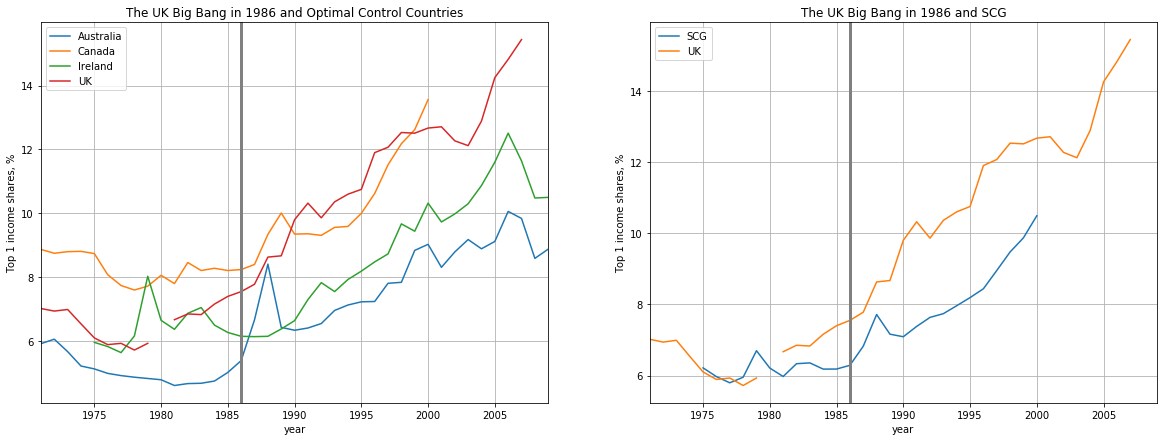

In [139]:
fig1 = plt.figure(figsize=(20,7))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

dfc_top1.plot(x ='year', y = 'Top1', ax=ax1, legend=False)
ax1.grid(True)
ax1.set_ylabel('Top 1 income shares, %')
ax1.axvline(1986, c='grey', linewidth = 3)
ax1.legend(['Australia', 'Canada', 'Ireland', 'UK']);
ax1.set_title("The UK Big Bang in 1986 and Optimal Control Countries");

dfc_top1.plot(x='year', y ='SCG', ax=ax2, legend=False)
dfc_top1.plot(x='year', y = 4, ax=ax2, legend=False)
ax2.grid(True)
ax2.set_ylabel('Top 1 income shares, %')
ax2.axvline(1986, c='grey', linewidth = 3)
ax2.legend(['SCG', 'UK']);
ax2.set_title("The UK Big Bang in 1986 and SCG");

In [140]:
round(dfc_rand_top1.head(15), 2)

year      Top1                                                      \
Country       Australia Canada Denmark Finland France Germany Ireland Italy   
0        1971      5.92   8.87    8.24    9.26   8.47    11.3     nan   nan   
1        1972      6.06   8.75    8.24     8.7   8.52     nan     nan   nan   
2        1973      5.67    8.8     nan     8.1   8.87     nan     nan   nan   
3        1974      5.22   8.81    7.31    7.46    8.5    10.1     nan  7.46   
4        1975      5.13   8.74     6.8    5.91   8.48     nan    5.96  7.24   
5        1976      4.99   8.08    6.62    5.66   8.44     nan    5.83   7.1   
6        1977      4.92   7.74    6.13    5.51   7.79    10.2    5.64   6.8   
7        1978      4.87    7.6    5.77    5.15    7.8     nan    6.16  6.71   
8        1979      4.83   7.72    5.62    4.87   7.82     nan    8.03  6.83   
9        1980      4.79   8.06    5.47    4.32   7.63   10.43    6.65   6.9   
10       1981      4.61    7.8    5.38    3.96   7.55     nan    6.37  6.47   
11       1982      4.67   8.46    5.21    3.55   7.07     nan    6.87   6.4   
12       1983      4.68   8.21    5.27    3.49   6.99    9.06    7.05  6.34   
13       1984      4.75   8.28    5.26    4.11   7.03     nan     6.5  6.54   
14       1985      5.02   8.21    5.21    4.03    7.2     nan    6.27  6.81   

                                                                 \
Country Japan Netherlands New Zealand Norway Sweden Switzerland   
0        8.42         nan        6.43   5.91    5.8       10.81   
1         8.1         nan        7.08   5.74   5.67         nan   
2        7.62         6.9        7.47   5.64   5.57        9.77   
3         7.2         nan        7.55   5.48   5.47         nan   
4        7.08        6.12        6.56   5.41   5.29        8.79   
5        6.81         nan        7.48   5.31   4.95         nan   
6        6.77        6.01        6.13   5.33   4.69        8.49   
7        6.96         nan        6.12   4.93   4.47         nan   
8        7.25         nan        5.77   4.91   4.25         8.4   
9        7.16         nan        5.65    4.6   4.05         nan   
10       7.11        5.85         5.5   4.47   3.97         8.4   
11       7.02         nan        5.49   4.43   3.98         nan   
12       6.94         nan        5.68   4.42   4.08        8.39   
13       6.95         nan         5.6   4.39   4.13         nan   
14       7.03        5.92        5.51   4.45   4.12        9.05   

                       average  diff  
Country United Kingdom                
0                 7.02    8.13 -1.11  
1                 6.94    7.43 -0.49  
2                 6.99    7.44 -0.45  
3                 6.54    7.32 -0.78  
4                  6.1    6.73 -0.63  
5                 5.89    6.48 -0.59  
6                 5.93    6.58 -0.65  
7                 5.72    6.05 -0.33  
8                 5.93    6.36 -0.43  
9                  nan    6.31   nan  
10                6.67    5.96  0.71  
11                6.85    5.74  1.11  
12                6.83     6.2  0.63  
13                7.16    5.78  1.38  
14                 7.4    6.06  1.34

In [141]:
# Show mean of the difference
round(dfc_rand_top1['diff'].abs().mean(), 2)

2.67

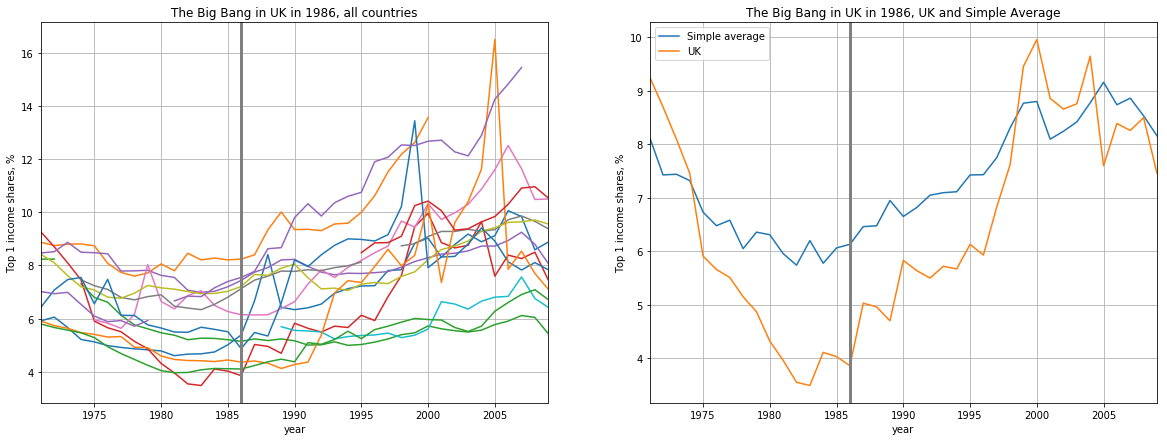

In [142]:
fig2 = plt.figure(figsize=(20,7))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)

lines = ax1.get_lines()

dfc_rand_top1.plot(x ='year', y = 'Top1', ax=ax1, legend=False)
ax1.grid(True)
ax1.set_ylabel('Top 1 income shares, %')
ax1.axvline(1986, c='grey', linewidth = 3)
#ax1.legend([14], ['UK']) # same color line for UK?
ax1.set_title("The Big Bang in UK in 1986, all countries");

dfc_rand_top1.plot(x='year', y ='average', ax=ax2, legend=False)
dfc_rand_top1.plot(x='year', y = 4, ax=ax2, legend=False)
ax2.grid(True)
ax2.set_ylabel('Top 1 income shares, %')
ax2.axvline(1986, c='grey', linewidth = 3)
ax2.legend(['Simple average', 'UK']);
ax2.set_title("The Big Bang in UK in 1986, UK and Simple Average");

The graphical representation shows clearly that the optimal SCG is able to mimic the UK more closely in the pre-treatment period compared to the the simple average. 

In the next section we present the treatment effect of interest by introducing the potential outcome model and the necessary and sufficient assumptions made by the authors. 

***
## *Underlying Assumptions and the Average Treatment Effect of the Treated* <a class="anchor" id="assumptions-att"></a>
***

#### *The potential outcome framework* <a class="anchor" id="potential-outcome"></a>
To understand and evaluate the estimated average treatment effect of interest, it is important to undestand first the underlying assumptions made to adress the two fundamental problems in causal inference, the "data missing" and the selection problem. For this purpose, we introduce the potential outcome framework more formally. We then apply it to our presented paper on the macro level, discussing the validity of the estimation strategy.

As mentioned above, the goal of causal inference is to estimate the unbiased effect of a treatment $D$ on an outcome $Y$ by trying to answer the "what if" question. In the binary case, where $D$ indicates a situation where the treatment is present, $D = 1$ or not, $D = 0$, as it is the case for the presented paper, we ask: What would have happened to the top per cent income shares (the outcome) $Y$ if the Big Bang (treatment) $D$ would have been absent? These two potential outcomes of the same unit represent parallel developments in two different worlds. Yet, in reality we observe only one of these two outcomes. This is the so called "missing data" problem in causal evaluation studies. 

The key assumptions of the potential outcome framework is that for each unit of interest there are two potential outcomes, even though we can observe only one. The outcome for each individual unit under the treatment, $D_i = 1$, denoted as $Y^1_i$ and the outcome in the absense of treatment, $D_i = 0$, denoted as $ Y^0_i $. In our case, the subscript $i$ represents a country. 

\begin{align*}
Y_i = \begin{cases}
Y^1_i & \quad\text{if}\quad D_i = 1 \\
Y^0_i & \quad\text{if}\quad D_i = 0
\end{cases}
\end{align*}  

Then the treatment effect of each unit is the simple difference between the potential outcomes under each treatment state.  

\begin{align*}
 \textit{Individual effect} \quad Y^1_i - Y^0_i 
\end{align*}  

Because of the "missing data" problem, causal effects cannot be calculated on the individual level.

#### *Average treatment effect and the naive estimator* <a class="anchor" id="att-naive"></a>
An alternative is then to calculate the treatment effect at the population level, the ***Average Treatment Effect (ATE)*** that estimates the *ATE* for a randomly selected unit from the population of interest. 
    
\begin{align*}
 \textit{ATE} \quad E[Y^1_i - Y^0_i] = E[Y^1_i] - E[Y^0_i]
\end{align*} 
    
However, taking the exected differences does not solve the "missing data" problem. This means that we observe two groups in the population of interest, units under the treatment, $D_i = 1$, the treated group, and the units without the treatment, $D_i = 0$, the counterfactual or control group. The idea is then to take a naive comparison of averages by their treatment status as simple differences, which can be written as follows.   

\begin{align*}
\textit{Naive estimator} \quad \hat{\delta}_{NAIVE} = E[Y^1_i | D_i = 1] - E[Y^1_i | D = 0] = E[Y^1_i - Y^0_i] + E[Y^1_i - Y^0_i | D_i = 1] - E[Y^1_i - Y^0_i]  \\ + E[Y^0_i | D_i = 1] - E[Y^0_i | D_i = 0]
\end{align*}

The naive estimator equals the *ATE* plus some distrubance terms, the so called selection bias that can be divided into sorting on gains and sorting on levels. This leads to the second fundamental problem: The selection problem. This selection problem is rooted in the heterogeniety of the two groups, the observed and unobserved differences between the treated and control units in the population of interest. Using the example in the presented paper, this means that the UK intentially selected into treatment because it had better preconditions to release financial deregulations (selection on levels) and/ or because they presumed higher returns than other countries from the financial deregulation (selection on gains). Then, even after controlling for observed outcomes, the treatment status depends on unobserved gains. This is often referred to as **essential heterogeneity**, what we denote as: 

\begin{align*}
(Y^0_i, Y^1_i)  \not\perp \!\!\! \perp D_i | X = x
\end{align*}

This implies that there is an underlying distribution of potential benefits of the treatment in the population such that the treatment status can be different for different parts of the distribution. If the potential outcomes and the treatment are not independent then the two groups, treatment and control differ systematically in their observed and/ or unobserved characteristics. Thus,

\begin{align*}
E[Y^0_i | D_i = 0] \neq E[Y^0_i] \quad \text{and} \quad
E[Y^1_i | D_i = 1] \neq E[Y^1_i]
\end{align*}

leading to $ \hat{\delta}_{NAIVE} \neq ATE $. Therefore, the focus of the empirical evaluations is to overcome the selection bias. 
The *RCT* solves the selection problem due to random treatment assignment, establishing independency between the treatment and the potential outcomes. That is why the *RCT* is sometimes referred as the *"golden standard"* of the evaluation methods. Hence, an *RCT* implies the following condition. 

\begin{align*}
(Y^0_i, Y^1_i)  \perp \!\!\! \perp D_i
\end{align*}

#### *Conditional independence assumption* <a class="anchor" id="cia"></a>
In some cases the independence also known as irgnorability assumption holds after conditioning on observeable covariates $X = x$.

\begin{align*}
(Y^0_i, Y^1_i)  \perp \!\!\! \perp D_i | X = x
\end{align*}

This condition is then referred to as the **Conditional Independence Assumption** (*CIA*) and can be represented in two equations. 

\begin{align*}
A1. \qquad E[Y^1_i | D_i = 1] = E[Y^1_i | D_i = 0] \\
A2. \qquad E[Y^0_i | D_i = 1] = E[Y^0_i | D_i = 0] 
\end{align*}

To see how these assumptions influence the estimate of the true treatment effect, let us assume that *A1* holds while *A2* does not. Then we have,

\begin{align*}
\hat{\delta}_{NAIVE} = E[Y^1_i | D_i = 1] - E[Y^0_i | D = 0] = E[Y^1_i - Y^0_i | D_i = 1] + E[Y^0_i | D_i = 1] - E[Y^0_i | D_i = 0]
\end{align*}

The naive estimator equals the **Average Treatment Effect on the Treated** (*ATT*), the isolated treatment effect of units under treatment, plus the selection bias (sorting on the levels). Now we assume the opposite, *A2* does hold while *A1* does not. Then we have, 

\begin{align*}
\hat{\delta}_{NAIVE} = E[Y^1_i | D_i = 1] - E[Y^0_i | D = 0] = E[Y^1_i - Y^0_i | D_i = 1] 
\end{align*}
 
In this case the naive estimator equals the *ATT*. We can rewirte the above equation as follows to see that the naive estimator equals the *ATE* plus the selection bias (sorting on gains). 

\begin{align*}
\hat{\delta}_{NAIVE} = E[Y^1_i | D_i = 1] - E[Y^0_i | D = 0] = E[Y^1_i - Y^0_i] + E[Y^1_i - Y^0_i | D_i = 1] - E[Y^1_i - Y^0_i]
\end{align*}

Finally, assuming that both assumptions *A1* and *A2* hold, we can estimate an unbiased *ATE* with the naive estimator. 

\begin{align*}
\hat{\delta}_{NAIVE} = E[Y^1_i | D_i = 1] - E[Y^0_i | D = 0] = E[Y^1_i - Y^0_i] = \textit{ATE}
\end{align*}

#### *Stable unit treatment value assumption* <a class="anchor" id="sutva"></a>
However, the *CIA* is a sufficient condition and not a necessary for an unbiased estimastor of the *ATE*. To reach an unbiased estimator, we need additionally to the *CIA* the **Stable Unit Treatment Value Assumption** (*SUTVA*). The *SUTVA* states that there are no spill-over and/ or general equilibrium effects in the population. This means that the two potential outcomes of each unit do not depend on which or how many units are treated. The *CIA* together with the *SUTVA* provide the necessary and sufficient condition for an unbiased estimation of the *ATE*.

#### *Assumptions in the presented paper* <a class="anchor" id="application-assumptions"></a>
After introducing the fundamental concepts and assumptions for evaluation designs, it is important to understand how these are encorporated in the presented paper of Tanndal and Waldenström to overcome the fundamental evaluation problems and extract the true treamtment effect. To do so, the authors use the SCM, a hybrid of the matching method and *diff-in-diff*. <br>

#### *SUTVA*
For the underlying assumptions, Tanndal and Waldenström refer to the framework of Abadie, Diamond and Heinmueller (2010). Even though the assumptions are not explicitly stated, the authors claim "the usual assumption of no interference between units", namely the *SUTVA* assumption. They further write: "That is, we assume outcomes of the untreated units are not affected by the intervention implemented in the treated unit." <br>

Transferring this assumption to the presented paper, this means that the evolution of the top income shares after the Big Bang and top income shares in the absence of the Big Bang would have been the same, independently of which country would have implemented the Big Bang. For example, the top income shares of Australia, with the Big Bang and without the Big Bang, would stay the same even if Irealand would have implemented the Big Bang instad of the UK. Furthermore, it also implies that the top income shares of the control countries are not influenced by the fact that the UK and Japan have relased financial deregulations. In other words it means that the two Big Bangs have no influence on the global performance of the financial markets, for example on the New York of Frankfurt stock exchange and hence no influence on the top income shares of other countries.

#### *CIA*
However, it is less obvious how the authors apply the *CIA*. This is because the assumption is implied by the estimation method itself. <br>
To demonstrate the second point, let us divide the SCM into two steps, matching and *diff-in-diff*. The matching method allows to overcome the "missing data" and the selection on observeables by finding the most suitable comparison for treated units, based on observed covariates $X$. Therefore, matching fulfills the second assumptions of the *CIA*, *A2*, such that:

\begin{align*}
Y^0_i  \perp \!\!\! \perp D_i | X = x \quad \text{and therefore} \quad \textit{A2} \quad E[Y^0_i | D_i = 1] = E[Y^0_i | D_i = 0] 
\end{align*}

For the paper presented, this means that the SCG is able to construct the conterfactual evolution of the top income shares in the UK in case of the absence of the Big Bang. As mentioned before, matching allows to control for observed differences, but it neglects differences in unobservables. Hence, if essential heterogeneity is present, the assumption *A2* is violated and it is no longer possible to isolate the *ATT*. Therefore, the SCM uses the *diff-in-diff* method in the second step to control for unobserved covariates. Because the SCG matches the treatment unit in the observed covariates, it allows for the effect of time-variant unobserved covariates (please see the formal argument in section "The Synthetic Control Method"). After accounting for observed confounders and essential heterogeneity, it is valid to assume the *A2* of the *CIA* to hold, allowing to estimate credibly the *ATT*. This implies the parallel assumption, which claims that if the economic prerequisites, like economic growth, GDP per capita etc., are similar even after the Big Bang, it is likely that the impact on the income shares can be due to the treatment, the Big Bang. Further, the *CIA* implicitly requires that no unobserved confounders are affecting the financial deregulations.

This is because the construction of the comparison unit is only credible if the matching on the economic characteristics is sufficent to assume that the units will evolve similarly in the future under the conterfactual state (see section "Methodology: The Synthetic Control Group"). However, in case an important economic prerequisite is left out, the comparison units might evolve differently because of the very missing counfounder. Consequently, it cannot be guaranteed that the units would have evolved similarly in the counterfactual state. Therefore, the assumption that the unobserved do not affect the treatment is necessary since matching on unobserved or unavailable confounders is not possible. Another assumption that is implcitly contained by the *A2* of the *CIA* is that the treatment has no effect before its implementation. If the treatment unit would have acted on the knowledge of the treatment effect, it would have affected the outcome such that the comparison unit would be matched on the behavior of the treated unit as if it is already in the treated state. Hence, the construction of a counterfactual would be distroted. 

All in all, Tandall and Waldenström employ the *A2* and the *SUTVA* assumptions for an unbiased estimate of the *ATT*.'

***
## *Discussion of the underlying assumptions* <a class="anchor" id="discussion"></a>
***

#### *Missing confounders* <a class="anchor" id="missing-counfounders"></a>

Relying on the *SUTVA* and the *A2* of the *CIA*, Tanndal and Waldenström establish the causal graph as presented in the subsection "Causal Graph" to uncover the unbiased effect of the Big Bang on the evolution of the top income shares. Thereby, they assume to have captured the main confounders for top income shares, e.g, GDP growth, income tax rate, political inclination etc., blocking the backdoor path that contributes to the association between the treatment and output. Further, the SCM allows to account for the effect of unobserved, time-variant confounders. To assess the validity of their identifiction strategy, it is therefore important to discuss the established causal relationships and in how far the econometric assumtions can be backed up by economic theory. 

One potential problem for the identification strategy arises when there are missing observed and unobserved confounders that entail explanation power for the financial deregulation and the evolution of the top income shares. Apart from the fact that it is econometrically impossible to account for all available confounders due to over-fitting and data availability, there is no consensus in the literature about the importance of exogenous factors that explain top income shares. As a result, is not an easy task to assess the plausability of the established causal relationships or the validity of the identification strategy. The authors of the presented paper adress this problem in their robustness checks. They show that their results are not driven by the selection of confounders or the chosen pre-treatment time periods. Doing so, they include alternative controls to capture the country´s tax system, economic development, trade and finacial openess as well as a proxy for technological developement etc., and permutate the pre-treatment periods. Thereby, two problems arise. First, because of the data availability the authors use proxies for the additional confounders. For example, they use the Quinn (1977) index and the KAOPEN index by Chinn and Ito (2008) to account for international openess of the financial systems. Moreover, since computerization was a part of the Big Bang in the UK, it is crucial to account for the technological development. Yet, the authors used the "number of cell phones used" from the CHAT data base (Comin and Hobijin, 2009) as the closest proxy for the technological development, admitting the limited relevance to capture the ongoing technological development. <br>

Finally, it remains unclear if the proxies entail sufficient explanation power to capture the important confounders, like globalization and technological development that might have enhanced the financial deregulation and influenced the evolution of the top income shares. Hence, other scholars argue that the impact of the financial deregulation is not fully captured by the sudden Big Bang but rather represents a long-term process (Bellinger and Michie, 2014). On this background, an alternative causal relationship can be established as follows.

#### *Alternative causal graph* <a class="anchor" id="altern-cause"></a>

The alternative causal graph shows the same relationships as above. It is extended by another variable $G$ that represents other, possibly missing confounders, like globalization trends, technological development, the role of institutions etc., that affect the financial deregulation and top income shares. Further, it includes one more causal relation from the unobserved confounders $U$ to the treatment, the Big Bang, $D$. These additional causal relations might violate the *A2* from the *CIA* and the *SUTVA*. 

<img src= "Latex/Causal_Graph_alternative.PNG" height="800" width="800" />

The following section dicusses the possible channels through which these assumptions might be violated. 

#### *Violation of the A2 of CIA and SUTVA* <a class="anchor" id="violation"></a>

The problem of missing confounders that are explanatory for the financial deregulation and top income shares might culminate in the violation of the two fundamental assumptions, the *A2* from the *CIA* and the *SUTVA*.

As mentioned above, *SUTVA* excludes the possibility of spill-overs and changes in the general equilibrium. However, it seems questionable to assume that the the potential outcomes, the top income shares of the included countries are independent of which country is treated or the number of countries which are treated (treatment intensity).

If the treated country maintains strong interdependencies to other financial markets or if more and more countries select into treatment, increasing the pressure of global competition, it is plausible to expect spill-over effects. Thereby, spill-over effects might be positive or negative. The increase in the efficiency of the UK´s financial market might be followed by an increase in the expected future returns, attracting agents from other countries, private investors or firms. In this case, agents from other countries would also benefit from the rigorous financial deregulation in the UK. Thus, the participation of foreign invesment could then impact the top income shares of other countries. While this generates capital inflow into the UK´s financial market, it causes capital outflow from foreign financial markets, creating a negative spill-over effect. The changes in the capital flows on the global level might lead to a change in the general equilibrium. The latter seems reasonable if we, for exmaple, remember that after the abolishion of fixed commission fees, "[...] the number of active firms increased, and daily stock market turnover nearly doubled" (Masulinus and Ng, 1995). The reforms lead to an internalization of the UK financial market, causing crowding out effects in other global financial hubs "[...] like Stockholm, Frankfurt, Paris and Milan" (Houthakker and Williamson, 1996; Clemons and Weber, 1990). Another positive spill-over effect could be the "role model" effect. In this case, other countries might have been pressured by the increased competition on the global level or just decided to follow the successful example of the UK, leading as well to a change in the general equilibrium. The existence of spill-over effects violates the *SUTVA*, undermining the validity of the identification to estimate the unbiased *ATT* of the Big Bang. Yet, the authors do not pursue this issue further. 

The *A2* from the *CIA* is crucial to estimate the *ATT*, it requires the potential outcome in the untreated state to be equal for both comparison units, the UK and its SCG. The assumption might be violated when important economic prerequisites that affect the financial deregulation and the top income shares are missing or when the treatment effect is already in place before its implementation. This is because the control unit cannot be matched accoring to the missing/ unobserved confounders and they might then differ across the treatment and its control unit. For example, one could argue that the UK had a comparative advantage to other countries in the donor pool to not only release financial deregulations but also affect the upper part of the income distribution. The SCG can then only control for this to some extent by matching the conterfactual state based on the parameters that affect the likelihood of a financial deregulation and the income distribution. However, if important parameters are left out the SCG cannot be matched accordingly and the conterfactual state cannot be credibly assumed to be equal for the comparison units. If the comparison units differ in their economic prerequisites, it is likely that they differ in other unobserved confounders, introducing a bias in the estimation of the *ATT* (see section "Methodology: The Synthetic Control Method" for a more formal argument). The authors justify their assumptions by inlcuding further confounders, showing that the results are not affected. We are able to replicate and validate this outcomes in the robustness check section. Further, Tandall and Waldenström provide support for parallel assumption by showing that the trends of the main economic variabels are parallel, even after the treatment. They argue that if the comparison units are similar in their economic characteristics, even after the treatment, the main driver of the outcome is the treatment itself. 
The authors can show that the included economic parameters do not deviate notably in the post-treatment period except the top income tax rate. We validate the parallel assumption in the data section, noting that the difference in the taxation might cause a bias in the estimation. The authors estimate that the effect of taxation accounts for 13 per cent of the effect of the Big Bang. They further arue that the the effect is relatively small and hence not able to undermine the importance of the Big Bang. 

However, including more variables does not provide a remedy against the fact that there important confounders, like general global and technological trends and economic policies etc., that are missing or not captured approriatly by the data.

Furthermore, by including more variables delutes the importance of each variable. This might drive away the focus of relative important variabels, causing a biased estimation (see section "Methodology: The Synthetic Control Method"). Another problem with inlcluding more variables is that the data availability is getting worse since not every variable is available for every counrty and for the same time period. Therefore, each time a country is missing key variabels in the important periods, it has to be withdrawn from the donor pool. This can affect the construction of the optimal SCG substantially and therefore the estiamtion of the *ATT*. Hence, one should bear in mind the consequences when including or excluding economic variabels or donor countries to reach a better fit for the treatment unit. 

All in all, if the above mentioned issues raise concern, it is likely that the estimation of the *ATT* is biased, mixing up the effect of the Big Bang with other confounders, like general global trends, technological development or economic policies in the past. However, if one is willing to believe that the *A2* from the *CIA* and *SUTVA* are valid, then an unbiased *ATT* of the Big Bang on the top income shares can be extracted from the analysis. 

***
## *Methodology: The Synthetic Control Method* <a class="anchor" id="SCM"></a>
***


#### *The Synthetic Control Method at work* <a class="anchor" id="SCM-at-work"></a>

The formal defnition of the SCM follows from Abadie, Diamond, and Hainmueller (2010) and Abadie, Diamond, and Hainmueller (2011).

Suppose we observe $J+1$ units over $T+1$ time period. Notationally, $j=1, ..., J+1$ units are observed for time periods $t=1,...,T$. Without loss of generality, assume that only the first unit is exposed to the intervention. That is, $j=1$ is treated unit and $j=2,...,J+1$ are potential control units that can contribute to the SCG. The intervention (financial deregulation) occurs at time period $T_0$, so that $1,2,...T_0-1$ are pre-intervention periods and $T_0,T_0+1,...,T$ are post-intervention periods. 

Let $Y_{it}^{0s}$ is the share of income received by the top $s$ percentile that would be observed for unit $i$ at time $t$ in the absence of the intervention, and $Y_{it}^{1s}$ is the outcome when $i$ is exposed to the intervention in periods $T_0 \text{ to } T$. It is clear that in the pre-treatment period $Y_{it}^{1s}=Y_{it}^{0s}$. After treatment is introduced $Y_{it}^{1s}\neq Y_{it}^{0s}$. Further we skip the notation $s$, since it is redundant (we focus on top one percent).

Let $\alpha_{it}=Y_{it}^1-Y_{it}^0$ be the *ATT* for unit $i$ at time $t$. The observed outcome for unit $i$ at time $t$ is $Y_{it}=Y_{it}^0+\alpha _{it}D_{it}$. Since only the first region is exposed to the intervention after period $T_0$, we have 
\begin{align*}
D_{it} = \begin{cases}
1 & \quad\text{if}\quad i=1 \text{ and } t \geq T_0 \\
0 & \quad\text{if}\quad \text{otherwise}
\end{cases}
\end{align*} 

In order to construct the SCH we have to made two crucial **assumptions** as mentioned above: 
##### 1) *CIA*: The intervention has no effect on the outcome prior to their implimentation (also no anticipation effect), that is for $t\in{1,...,T_0-1}$ and $i\in{1,...J+1}$, we have that $Y_{it}^0=Y_{it}^1$. 

It is possible that intervention might affect the outcome treated unit before the intervention date, through anticipation effects, in such cases we can redefine $T_0$ to anticipation date. In the *anticiapation effects part* of the current work we check the early effect of financial deregulation on the top one per cent income share in the UK. We change the treatment date from 1986 (actual intervention date) to 1984 (anticipation date, one year after the agreement for the financial deregualtion was reached) and check whether there were anticipation effects.

##### 2) *SUTVA* assumption: Outcomes of the untreated units are not affected by the intervention implemented in the treated unit. 

As mentioned above, our goal is to estimate the *ATT* in the post-intervention period: $\alpha_{1T_0},..., \alpha_{1T}$. $\alpha_{1t}=Y_{1t}^1-Y_{1t}^0=Y_{1t}-Y_{1t}^0$ for $T_0,T_0+2,...,T$ periods. Note that $Y_{1t}^1$ is observed and $Y_{1t}^0$ is unobserved on the treated unit in the post-intervention period. In order to estimate $Y_{1t}^0$, Abadie, Diamond, and Hainmueller(2010) assume $Y_{it}^0$ as given by a factor model:

\begin{equation}
Y_{it}^0=\delta_t+\bf{\theta_t Z_i}+\lambda_t U_i+\epsilon_{it}
\end{equation} 

where $\delta_t$ is a time fixed effect, $\bf{Z_i}$ is a $(r \times 1)$ vector of observed covariates that are important to the evaluation of top income shares (not affected by the intervention), $\bf{\theta_t}$ is a $(r \times 1)$ of vector of unknown parameters, $\lambda_t$ is a vector of unobserved common factors, $U_i$ is a vector of unobserved factors affecting the top income shares (but do not cause the financial deregulation in question),  $\epsilon_{it}$ is ideosyncratic shocks. $Z_i$ can be constructed by choosing combinations of covariates over years, for instance weighted average over some years. 

Ideally, we would like to constuct SCG that resembles the treated unit in all relevant pre-intervention characteristics. Abadie, Diamond, and Hainmueller (2010) propose that the potential outcome can be estimated using a weighted average of untreated countries if the variables that effect the top income shares have the same effect in all countries. For this lets define a vector of weights ${\bf W}=(w_2,...w_{J+1})$ such that $w_j\geq 0$ and $w_2+...+w_{J+1}=1$. Suppose that there are $(w_2^*,...w_{J+1}^*)$ such that  

\begin{align*} 
\sum_{j=2}^{J+1} w_j^* Y_{j1}=Y_{1 1}, \sum_{j=2}^{J+1} w_j^* Y_{j2}=Y_{1 2}, ... ,\sum_{j=2}^{J+1} w_j^* Y_{jT_0}=Y_{1 T_0} \text{ and } \sum_{j=2}^{J+1} w_j^* {\bf Z}_j={\bf Z_1} \tag{1} 
\end{align*} 

Then an estimator for the true treatment effect, $\alpha_{1t}$, is $\hat{\alpha}_{1t}=Y_{1t}-\sum_{j=2}^{J+1} w_j^* Y_{jt}$ for $t\in\{T_0,...,T\}$. 

Although we considered factor model, the SCM does not limit the functional form of the potential outcome to only factor model, Abadie, Diamond, and Hainmueller (2010) show unbiasedness the synthetic control estimator for autoregressive model for time varying coeficients.

To solve the conditions in $(1)$, a nested penalty function is established in Abadie, Diamond, and Hainmueller (2010) to fit each control variable and pre-treatment year when choosing $\bf{W^*}$. It might be the case that there is no $W^*$ such that $(1)$ hold exactly, in such cases weights will be chosen to hold the equations approximately. The optimal weights should minimize the distance between the synthetic control unit and the treated unit. To define the distance authors combine characteristics of the exposed unit in matrix $X_1=(Z_1',Y_{1 1},...,Y_{1 T_0-1}')$ and the conrol units in similar matrix $X_0$. Then $W^*$ minimizes 

\begin{align} 
||X_1-X_0 W||_V=\sqrt{(X_1-X_0 W)'V(X_1-X_0 W)} \tag{2} 
\end{align} 

Where $V$ is defined as a symmetric and positive simidefinite matrix. $V$ allows different weights to the variables in $X_0$ and $X_1$ depending on their predictive power on outcome. An optimal choice of $V$ assigns weights that minimize the mean square error of the synthetic control estimator, that is $(Y_1-Y_0W^*)'(Y_1-Y_0W^*)$. $Synth()$ function that we will use below uses data driven procedure to choose $V^*$, which is chosen among all positive definite and diagonal matrices such that the MSPE of the outcome variable is minimized over some set of pre-intervention periods.

#### *Synth statistical package* <a class="anchor" id="synth"></a>

Abadie and Gardeazabal (2003), Abadie, Diamond, and Hainmueller(2010), and Abadie, Diamond, and Hainmueller (2013) introduced a statistical software [Synth](https://web.stanford.edu/~jhain/synthpage.html) that implements synthetic control methods for causal inference in comparative case studies with aggregate data.

_Synth_ package is avilable for MATLAB, Stata, and R. In the current notebook we use the Synth package intended for R with the use of [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/overview.html#background) package, which allows to call R functions from Python. We converted the functions of the Synth for R into Python formulas.

> #### $dataprep()$ function 

Using $dataprep()$ frunction of the Synth package, we reorginize the panel dataset into an appropriate format that is suitable for the main estimator $synth()$. $synth()$ requires as an input four data matrices: the vector of predictors for the treted unit, matrix of predictors for the control units, vector of ourcome variable for treated unit, matrix of outcome for control units. Output of $dataprep()$ contains a list of matrices which can be directly loaded into $synth$. 

The function takes this form in our project: dataprep(dataframe, predictor_variables, predictors_operator, time_predictors_pr, dependent_variable, unit_var, unit_names, time_var, treated_unit, control_units, time_optimize, time_plt). Input of the function contains a dataframe, predictors, the operators that act upon these predictors, the time-period over which to select the predictors, the dependent variable, the columns associated with unit numbers, unit names, time periods, the treated unit, the control units, the time-period over which to optimize, and the time-period over which outcome data should be plotted.

> #### $synth()$ function

$synth()$ function constructs this synthetic control group by searching for a weighted combination of control units chosen to approximate the unit affected by the intervention in terms of characteristics that are predictive of the outcome. The evolution of the outcome for the resulting synthetic control group is an estimate of the counterfactual of what would have been observed for the affected unit in the absence of the intervention. $synth()$ takes the list created by $dataprep()$ and as an output gives a list object that contains the weights on predictors and weights on control units that define contributions to the synthetic control unit. In the current research $synth()$ uses BFGS method for solving the optimization problem.

> #### $synth\text{_}tab()$ function

This function creates tables that Summarize Results of Synthetic Control Group Method using outcome of $dataprep()$ and $synth()$

The functions below are created using the results from $dataprep()$ and $synth()$ in order to use efficiently perform the replications in our current paper:

>#### $weights()$ function:

Using $synth\text{_}tab()$ function of the $synth$ package creates the dataframe of the weights of the SCG. As an input the function takes outputs of $synth()$ and $dataprep()$
   
>#### $plot\text{_}path()$ function:

Plots of the outcome of the treated unit and the synthetic control group.

>#### $gaps()$ function:

Creates the vector of difference between the outcome of the treated unit and the synthetic control group.

>#### $gaps\text{_}relative()$ function:

Creates the vector of relative difference between the outcome of the treated unit and synthetic control group. That is the difference between the outcome of the treated unit and the synthetic control group devided by the outcome of the synthetic control group.
 
>#### $plot\text{_}gaps()$ function:

Plots of the difference between the outcome of the treated unit and the synthetic control group. 
    
>#### $plot\text{_}gaps\text{_}relative()$ function:

Plots of the difference between the outcome of the treated unit and the synthetic control group. 


***
## *Data* <a class="anchor" id="data"></a>
***

#### *Income data*
Tandall and Waldenström take the data on top income shares from the World Wealth and Income Database (WID). The main advantage of using the top income share data is that they originate from very similar sources and have been computed using the exact same methodology, which makes them highly comparable over time and across countries. Since SCM depends on a full matrix of pre-treatment obsevations to calculate the optimal control group, some countries are excluded from analysis, typically when data is lacking for several subsequent years. In order to include as many countries as possible in the donor pool, the authors restrict pre-treatment period to begin in 1971 for the UK. The country donor pool is restricted to 16 countries that provide data over the observed period. 

#### *Control variables* <a class="anchor" id="control-vars"></a>
It is important to choose a proper set of control variables to create a credible SCG. There is no consensus in the literature regarding the choice of the exogenous factors that important to explain top income shares. For the control variables, the authors include for example tax rates and government spending, GDP per capita and growth rates, and indicators of labor market and political institutions. In addition, the they also include controls that consider the endogeneity of financial deregulation. Since it is possible that the Big Bangs can be considered endogenous to the prevailing income distribution or joint underlying factors. Therefore, Tandall and Waldenström include control variables such as: Stock market capitalization, index of share prices, also de jure indexes of financial market regulation (Quinn (1997) index). The table below shows control the main and extended control variables (see Appendix A1, Table A1, Appendix A2 and Table A2 of the presented paper).  

|Controls used|Description of variable|Source|
|--|--|--|
|TaxIndICP|Tax revenue from individuals on income, profts and capital gains (% of GDP)|OECD iLibrary (2015-02-25)|
|TopTaxRate|The highest marginal income tax rate|Piketty et al., 2014|
|growth|Annual GDP growth (%)|World Development Indicator|
|GDPPCcur|GDP per capita, current prices|World Development Indicator|
|exports|Exports of goods and services (% of GDP)|World Development Indicator|
|imports|Imports of goods and services(% of GDP)|World Development Indicator|
|GDPPCcons|GDP per capita, constant 2005 USD|World Development Indicator|
|ka open|Index of fnancial openness in capital account transactions, normalized|Chinn and Ito, 2012|
|rightwing|Right-wing executive|DPI, World Bank. Beck et al. 2001|
|pr|Proportional voting system|DPI, World Bank. Beck et al. 2001|
|SM|Stock Market, financial liberalization index|Kaminsky and Schmukler, 2008|
|DFS|Domestic Financial Sector, financial liberalization index|Kaminsky and Schmukler, 2008|
|Unemp|Unemployment rate|OECD iLibrary (2015-02-25)|
|current quinn|Quinn index, restrictions to the current account|Quinn, 1997|
|capital quinn|Quinn index, restrictions to the capital account|Quinn, 1997|
|epl|Employment protection legislation (OECD data)|Nickell, 2006|
|uc|Union coverage (combination of data)|Nickell, 2006|
|cellphone|Number of cell phones per capita|CHAT, Comin and Hobijin, 2009|
|SMC_GDP|Stock market capitalization (% of GDP)|Beck et al., 2010a|
|ger_mom|Legal origin: Germany (Japan)|La Porta et al., 1997|
|uk_mom|Legal origin: United Kingdom|La Porta et al., 1997|
|rule_law|Rule of law|La Porta et al., 1997|

For the baseline model the authors chose: GDP growth, GDP per capita, right-wing executive, legal origin (British or German), employment protection, financial openness in terms of the Quinn index and top income tax rates. To match the SCG optimally, the authors selected the years: 1971, 1976, 1979, 1982, 1985 of the pre-treatment period. In out replication of the main results, we chose the control variables and years from the baseline model of the authors (same as above). In the robuseness check section, we provide selected checks on the sensitivity of the results towards the constellation of the control variables and pre-treatment years.

In the following we reduce the presentation of the summary statistics to the main control variables. 

In [143]:
### Summary stats

# 1. Extract pre treatment data from original data
dfUK_pre = dfUK[(dfUK['year'] < 1986)]

# 2. Pre treatment data with control vbariables only
df_contrl = pd.pivot_table(dfUK_pre, index=['year'], columns=['Country'], values=[ 'Top1', 'growth', 'GDPPCcons','epl', 'rightwing', 'uk_mom', 'Unemployment', 'stock_price', 'TopIncomeTaxRate', 'capital_quinn', 'SM_cap_2panel'])

# 3. Add variables for SCG
df_contrl['SCG_Top1'] = 0.396 * df_contrl['Top1']['Australia'] + 0.394 * df_contrl['Top1']['Ireland'] + 0.21 * df_contrl['Top1']['Canada']
df_contrl['SCG_growth'] = 0.396 * df_contrl['growth']['Australia'] + 0.394 * df_contrl['growth']['Ireland'] + 0.21 * df_contrl['growth']['Canada']
df_contrl['SCG_GDPPCcons'] = 0.396 * df_contrl['GDPPCcons']['Australia'] + 0.394 * df_contrl['GDPPCcons']['Ireland'] + 0.21 * df_contrl['GDPPCcons']['Canada']
df_contrl['SCG_rightwing']  =  0.396 * df_contrl['rightwing']['Australia'] + 0.394 * df_contrl['rightwing']['Ireland'] + 0.21 * df_contrl['rightwing']['Canada']
df_contrl['SCG_uk_mom'] =  0.396 * df_contrl['uk_mom']['Australia'] + 0.394 * df_contrl['uk_mom']['Ireland'] + 0.21 * df_contrl['uk_mom']['Canada']
df_contrl['SCG_epl'] =  0.396 * df_contrl['epl']['Australia'] + 0.394 * df_contrl['epl']['Ireland'] + 0.21 * df_contrl['epl']['Canada']
df_contrl['SCG_capital_quinn'] =  0.396 * df_contrl['capital_quinn']['Australia'] + 0.394 * df_contrl['capital_quinn']['Ireland'] + 0.21 * df_contrl['capital_quinn']['Canada']
df_contrl['SCG_TopIncomeTaxRate'] =  0.396 * df_contrl['TopIncomeTaxRate']['Australia'] + 0.394 * df_contrl['TopIncomeTaxRate']['Ireland'] + 0.21 * df_contrl['TopIncomeTaxRate']['Canada']
df_contrl['SCG_stock_price'] = 0.396 * df_contrl['stock_price']['Australia'] + 0.394 * df_contrl['stock_price']['Ireland'] + 0.21 * df_contrl['stock_price']['Canada']
df_contrl['SCG_SM_cap_2panel'] =  0.396 * df_contrl['SM_cap_2panel']['Australia'] + 0.394 * df_contrl['SM_cap_2panel']['Ireland'] + 0.21 * df_contrl['SM_cap_2panel']['Canada']

In [144]:
# 4. Summary stats - ALL countries
all_sum = dfUK_pre.describe().loc[['mean', 'std'], ['Top1', 'growth', 'GDPPCcons', 'epl', 'rightwing', 'uk_mom', 'stock_price', 'TopIncomeTaxRate', 'capital_quinn', 'SM_cap_2panel']].round(2).transpose()

# 5. Summary stats - Only UK
uk_sum = dfUK_pre[(dfUK_pre['ccode'] == 17)].describe().loc[['mean', 'std'], ['Top1', 'growth', 'GDPPCcons', 'epl', 'rightwing', 'uk_mom', 'stock_price', 'TopIncomeTaxRate', 'capital_quinn', 'SM_cap_2panel']].round(2).transpose()

# 6. Summary stats - SCG
scg_sum = df_contrl.describe().loc[['mean', 'std'], ['SCG_Top1', 'SCG_growth', 'SCG_GDPPCcons', 'SCG_epl', 'SCG_rightwing', 'SCG_uk_mom', 'SCG_stock_price', 'SCG_TopIncomeTaxRate', 'SCG_capital_quinn', 'SCG_SM_cap_2panel']].round(2).transpose()
scg_sum = scg_sum.reset_index(level=1, drop=True)

# 7. Rename 
idx_rename_scg = {'SCG_Top1': 'Top1', 'SCG_growth': 'growth', 'SCG_GDPPCcons': 'GDPPCcons', 'SCG_epl': 'epl', 'SCG_rightwing': ' rightwing', 'SCG_uk_mom': 'uk_mom', 'SCG_stock_price': 'stock_price', 'SCG_TopIncomeTaxRate': 'TopIncomeTaxRate', 'SCG_capital_quinn': 'capital_quinn', 'SCG_SM_cap_2panel': 'SM_cap_2panel in bn'} 
scg_sum_renamed = scg_sum.rename(index=idx_rename_scg)
scg_sum_renamed

idx_rename = {'GDPPCcons': 'GDPPCcons', 'SM_cap_2panel': 'SM_cap_2panel in bn'}
uk_sum_renamed = uk_sum.rename(index=idx_rename)
all_sum_renamed = all_sum.rename(index=idx_rename)

# 8. Merge 
sum_fin = pd.concat([uk_sum_renamed, scg_sum_renamed, all_sum_renamed], axis = 1, sort = True)

In [145]:
# 9. Format output
arrays = [np.hstack([['UK']*2, ['SCG']*2, ['All']*2]) , ['mean', 'std', 'mean', 'std', 'mean', 'std']]
columns = pd.MultiIndex.from_arrays(arrays)
sum_fin.columns = columns 
round(sum_fin, 2)

UK              SCG                All         
                         mean     std     mean      std      mean      std
 rightwing                nan     nan     0.48     0.26       nan      nan
GDPPCcons           21,452.33 1,671.6 19,071.5 1,641.85 23,291.97 5,966.87
SM_cap_2panel in bn    151.51   98.83   676.31   175.08    391.77   542.63
Top1                     6.57    0.55     6.17     0.25      6.54     1.55
TopIncomeTaxRate         0.68    0.12     0.58     0.04      0.63     0.12
capital_quinn            75.0   24.55    62.34     7.58     68.94    18.34
epl                      0.19    0.02     0.28     0.02      0.66     0.34
growth                   2.18     2.7     3.51     1.48      3.03     2.19
rightwing                 0.6    0.51      nan      nan       0.4     0.49
stock_price             10.39    5.82    11.08     4.43     15.63    15.65
uk_mom                    1.0     0.0      1.0      0.0      0.33     0.47

The summary statistics in the table above displays the main control variabels for the UK, its SCG and the simple average of all countries.

In [146]:
dfc_top1.set_index("year", drop=True, inplace=True)
#dfc_top1.head().round(2)

In [147]:
uk_top1_pre = dfc_top1['Top1'][['United Kingdom']].loc[[1971, 1976, 1979, 1982, 1985]].round(2)
scg_top1_pre = dfc_top1['SCG'].loc[[1971, 1976, 1979, 1982, 1985]].round(2)
all_top1_pre = df_contrl['Top1'].loc[[1971, 1976, 1979, 1982, 1985]].mean(axis=1).round(2)

sum_top1_pre = pd.concat([uk_top1_pre, scg_top1_pre, all_top1_pre], axis = 1, sort = True)
sum_top1_pre.columns = ['UK', 'SCG', 'All'] 
sum_top1_pre

,UK,SCG,All
year,,,
1971,7.02,nan,8.04
1976,5.89,5.97,6.43
1979,5.93,6.7,6.33
1982,6.85,6.33,5.83
1985,7.4,6.18,6.16


The table above presents the top one per cent income shares for each year of the pre-treatment period which was used to match the UK with its optimal SCG. Additionally, the simple average is exposed. This table is also represented by the following graph. 

In [148]:
# Create new data frame to add SCM for all main control variables
dfUK_piv = pd.pivot_table(dfUK, index=['year'], columns=['Country']).reset_index()

# Add SCG values for all variables 
dfUK_piv['SCG_Top1'] = 0.396 * dfUK_piv['Top1']['Australia'] + 0.394 * dfUK_piv['Top1']['Ireland'] + 0.21 * dfUK_piv['Top1']['Canada']
dfUK_piv['SCG_growth'] = 0.396 * dfUK_piv['growth']['Australia'] + 0.394 * dfUK_piv['growth']['Ireland'] + 0.21 * dfUK_piv['growth']['Canada']
dfUK_piv['SCG_GDPPCcons'] = 0.396 * dfUK_piv['GDPPCcons']['Australia'] + 0.394 * dfUK_piv['GDPPCcons']['Ireland'] + 0.21 * dfUK_piv['GDPPCcons']['Canada']
dfUK_piv['SCG_rightwing']  =  0.396 * dfUK_piv['rightwing']['Australia'] + 0.394 * dfUK_piv['rightwing']['Ireland'] + 0.21 * dfUK_piv['rightwing']['Canada']
dfUK_piv['SCG_uk_mom'] =  0.396 * dfUK_piv['uk_mom']['Australia'] + 0.394 * dfUK_piv['uk_mom']['Ireland'] + 0.21 * dfUK_piv['uk_mom']['Canada']
dfUK_piv['SCG_epl'] =  0.396 * dfUK_piv['epl']['Australia'] + 0.394 * dfUK_piv['epl']['Ireland'] + 0.21 * dfUK_piv['epl']['Canada']
dfUK_piv['SCG_capital_quinn'] =  0.396 * dfUK_piv['capital_quinn']['Australia'] + 0.394 * dfUK_piv['capital_quinn']['Ireland'] + 0.21 * dfUK_piv['capital_quinn']['Canada']
dfUK_piv['SCG_TopIncomeTaxRate'] =  0.396 * dfUK_piv['TopIncomeTaxRate']['Australia'] + 0.394 * dfUK_piv['TopIncomeTaxRate']['Ireland'] + 0.21 * dfUK_piv['TopIncomeTaxRate']['Canada']
dfUK_piv['SCG_stock_price'] = 0.396 * dfUK_piv['stock_price']['Australia'] + 0.394 * dfUK_piv['stock_price']['Ireland'] + 0.21 * dfUK_piv['stock_price']['Canada']
dfUK_piv['SCG_SM_cap_2panel'] =  0.396 * dfUK_piv['SM_cap_2panel']['Australia'] + 0.394 * dfUK_piv['SM_cap_2panel']['Ireland'] + 0.21 * dfUK_piv['SM_cap_2panel']['Canada']

#round(dfUK_piv.head(), 2)

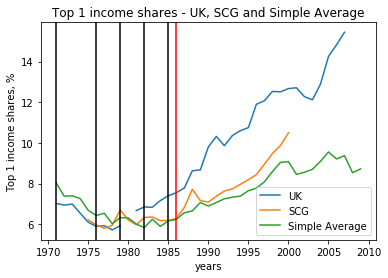

In [149]:
# Plot the evolution of the Top1: UK, SCG, overall average
UK, = plt.plot(dfUK_piv['year'], dfUK_piv['Top1'][['United Kingdom']], label='UK')
scg, =plt.plot(dfUK_piv['year'], dfUK_piv['SCG_Top1'], label='SCG')
sa, = plt.plot(dfUK_piv['year'], dfUK_piv['Top1'].mean(axis=1), label='Simple Average') #plot the average of the whole donor pool 

plt.title("Top 1 income shares - UK, SCG and Simple Average")
plt.xlabel("years")
plt.ylabel("Top 1 income shares, %")
plt.legend([UK, scg, sa], ['UK', 'SCG', 'Simple Average'])

# x coordinates for the lines
xcoords = [1971, 1976, 1979, 1982, 1985, 1986]
# Colors for the lines
colors = ['k','k','k','k','k', 'r']

for xc, c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

The optimal SCG of UK was constructed by matching economic characteristics in the pre-treatment period and the outcome variable, top one income shares in the above marked years: 1971, 1976, 1979, 1982, 1985, 1986. Thereby, instead of matching each year individually, the SCG is matched on an average over selected years. The authors do not provide an explicit explanation for the selection of the years. However, they emphasize that it is rarely the case where a perfect match can be constructed by including all possible years (see for a more formal argument in section "The Synthetic Control Method") and the selection of years is guided by the data availability. In some cases, it does not even make sense to match on the data that is too far in the past. Therefore, the SCM allows for an approximation of the treatment unit based on averages across selected years. In this way, the SCM gives some room for the researcher to avoid matching on outliers or choose the "matching years" based on economic reasoning. This provides flexibility to adopt the matching according to the data available to the researcher but leaves room for subjective judgements. To show that their results are robust against the selection of the pre-treatment years, the authors provide robustness checks (see section "Robustness Checks").

#### *The parallel assumption* <a class="anchor" id="parallel"></a>

An important underlying assumption of the SCM, implied in the *A2* of the *CIA*, is the parallel assumption (see section "Underlying Assumptions and the Average Treatment Effect of the Treated" and "Discussion of the Underlying Asumptions"). The SCM matches on the observed economic characteristics in the pre-treatment period, constructing the best fit. Yet, the SCM does not control for the development of the characteristics in the **post-treatment** period. The authors raise this issue, arguing that because the SCM does not controll for the parallel development of the comparison units, there might exist some exogenous shocks **after** the implementation of the Big Bang.
These shocks might lead to an exceptional deviation from the evolution of the SCG in the post-treatment period such that the SCG does not resemble the treated unit in the untreated state. If this is the case, the *A2* of the *CIA* is violated, since the change in the top income shares cannot be solely assigned to the Big Bang keading to an estimation bias of the *ATT*. The authors adress this problem by inspecting the post-treatment trends of the main control variables as follows. We validate the result of the authors that the parallel assumption holds in a broad sense except for the top income tax rate. 

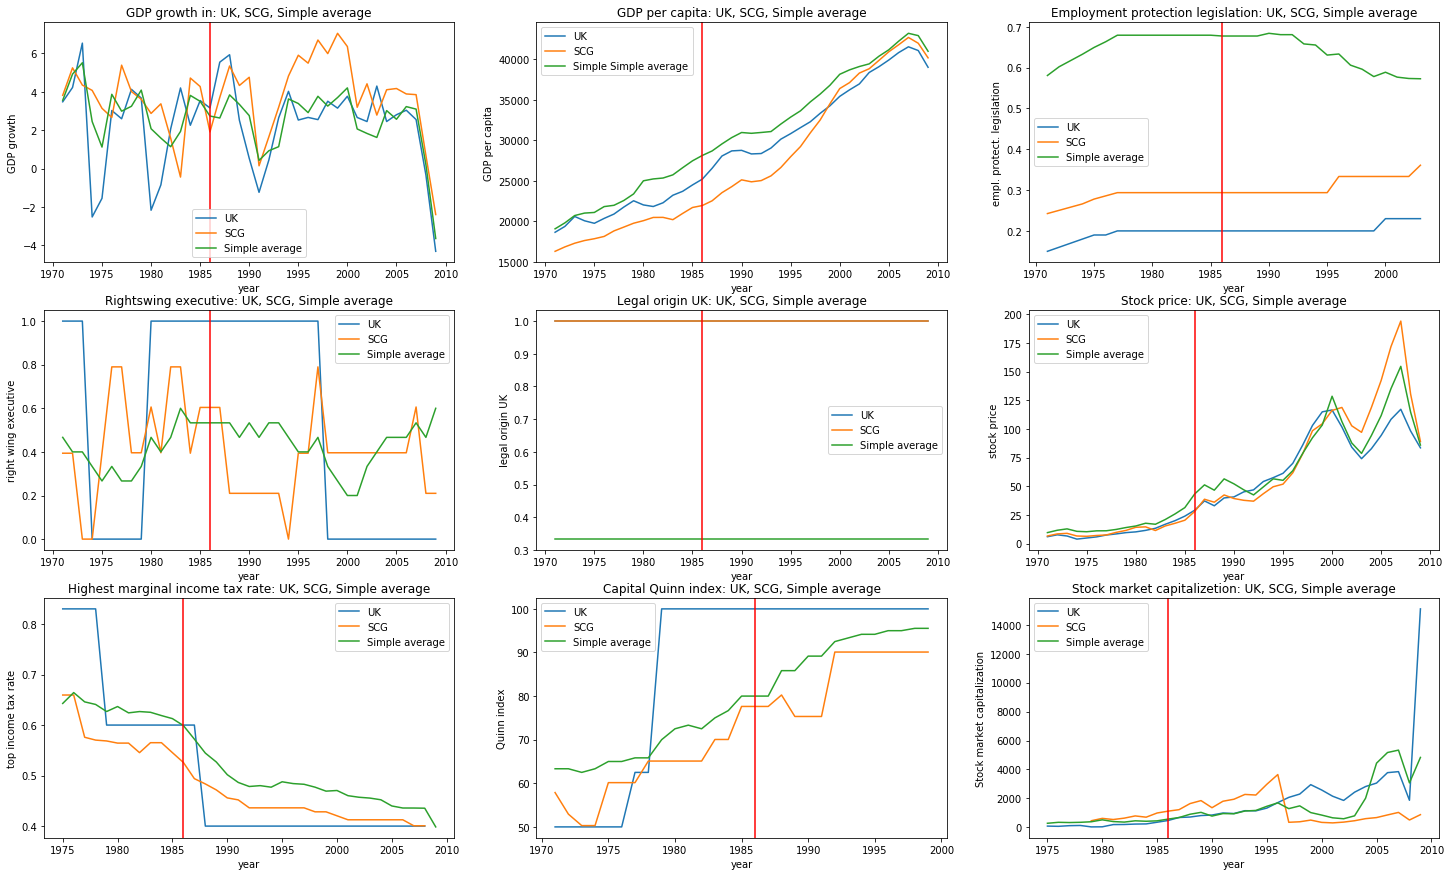

In [150]:
# Show evolution of control variabels for: UK, SCG and average! in the post-treatment period
# 'Top1', 'growth', 'GDPPCcons', 'epl', 'rightwing', 'uk_mom', 'stock_price', 'TopIncomeTaxRate', 'capital_quinn', 'SM_cap_2panel'

# Set the plot shell 
fig = plt.figure(figsize=(25,15))

#####AG: somehow loop doesnt work!!!
#for i in range(1,3):
 #   axi = fig.add_subplot(3, 3, i);
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

# Graphs of the control variables 
ax1.plot(dfUK_piv['year'], dfUK_piv['growth'][['United Kingdom']])
ax1.plot(dfUK_piv['year'], dfUK_piv['SCG_growth'])
ax1.plot(dfUK_piv['year'], dfUK_piv['growth'].mean(axis=1)) #plot the average of the whole donor pool
ax1.set_title('GDP growth in: UK, SCG, Simple average')
ax1.set_ylabel('GDP growth')
ax1.set_xlabel('year')
ax1.legend(['UK', 'SCG', 'Simple average']);

ax2.plot(dfUK_piv['year'], dfUK_piv['GDPPCcons'][['United Kingdom']])
ax2.plot(dfUK_piv['year'], dfUK_piv['SCG_GDPPCcons'])
ax2.plot(dfUK_piv['year'], dfUK_piv['GDPPCcons'].mean(axis=1)) #plot the average of the whole donor pool
ax2.set_title('GDP per capita: UK, SCG, Simple average')
ax2.set_ylabel('GDP per capita')
ax2.set_xlabel('year')
ax2.legend(['UK', 'SCG', 'Simple Simple average']);

ax3.plot(dfUK_piv['year'], dfUK_piv['epl'][['United Kingdom']])
ax3.plot(dfUK_piv['year'], dfUK_piv['SCG_epl'])
ax3.plot(dfUK_piv['year'], dfUK_piv['epl'].mean(axis=1)) #plot the average of the whole donor pool
ax3.set_title('Employment protection legislation: UK, SCG, Simple average')
ax3.set_ylabel('empl. protect. legislation')
ax3.set_xlabel('year')
ax3.legend(['UK', 'SCG', 'Simple average']);

ax4.plot(dfUK_piv['year'], dfUK_piv['rightwing'][['United Kingdom']])
ax4.plot(dfUK_piv['year'], dfUK_piv['SCG_rightwing'])
ax4.plot(dfUK_piv['year'], dfUK_piv['rightwing'].mean(axis=1)) #plot the average of the whole donor pool
ax4.set_title('Rightswing executive: UK, SCG, Simple average')
ax4.set_ylabel('right wing executive')
ax4.set_xlabel('year')
ax4.legend(['UK', 'SCG', 'Simple average']);

ax5.plot(dfUK_piv['year'], dfUK_piv['uk_mom'][['United Kingdom']])
ax5.plot(dfUK_piv['year'], dfUK_piv['SCG_uk_mom'])
ax5.plot(dfUK_piv['year'], dfUK_piv['uk_mom'].mean(axis=1)) #plot the average of the whole donor pool
ax5.set_title('Legal origin UK: UK, SCG, Simple average')
ax5.set_ylabel('legal origin UK')
ax5.set_xlabel('year')
ax5.legend(['UK', 'SCG', 'Simple average']);

ax6.plot(dfUK_piv['year'], dfUK_piv['stock_price'][['United Kingdom']])
ax6.plot(dfUK_piv['year'], dfUK_piv['SCG_stock_price'])
ax6.plot(dfUK_piv['year'], dfUK_piv['stock_price'].mean(axis=1)) #plot the average of the whole donor pool
ax6.set_title('Stock price: UK, SCG, Simple average')
ax6.set_ylabel('stock price')
ax6.set_xlabel('year')
ax6.legend(['UK', 'SCG', 'Simple average']);

ax7.plot(dfUK_piv['year'], dfUK_piv['TopIncomeTaxRate'][['United Kingdom']])
ax7.plot(dfUK_piv['year'], dfUK_piv['SCG_TopIncomeTaxRate'])
ax7.plot(dfUK_piv['year'], dfUK_piv['TopIncomeTaxRate'].mean(axis=1)) #plot the average of the whole donor pool
ax7.set_title('Highest marginal income tax rate: UK, SCG, Simple average')
ax7.set_ylabel('top income tax rate')
ax7.set_xlabel('year')
ax7.legend(['UK', 'SCG', 'Simple average']);

ax8.plot(dfUK_piv['year'], dfUK_piv['capital_quinn'][['United Kingdom']])
ax8.plot(dfUK_piv['year'], dfUK_piv['SCG_capital_quinn'])
ax8.plot(dfUK_piv['year'], dfUK_piv['capital_quinn'].mean(axis=1)) #plot the average of the whole donor pool
ax8.set_title('Capital Quinn index: UK, SCG, Simple average')
ax8.set_ylabel('Quinn index')
ax8.set_xlabel('year')
ax8.legend(['UK', 'SCG', 'Simple average']);

ax9.plot(dfUK_piv['year'], dfUK_piv['SM_cap_2panel'][['United Kingdom']])
ax9.plot(dfUK_piv['year'], dfUK_piv['SCG_SM_cap_2panel'])
ax9.plot(dfUK_piv['year'], dfUK_piv['SM_cap_2panel'].mean(axis=1)) #plot the average of the whole donor pool
ax9.set_title('Stock market capitalizetion: UK, SCG, Simple average')
ax9.set_ylabel('Stock market capitalization')
ax9.set_xlabel('year')
ax9.legend(['UK', 'SCG', 'Simple average']);

# Mark with vertical line the treatment period
xcoords = [1986]
colors = ['r'] 

ax1.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax2.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax3.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax4.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax5.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax6.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax7.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax8.axvline(x=xc, label='line at x = {}'.format(xc), c=c)
ax9.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

# Show graph
plt.show()

The graph in the lower left corner shows that the top income tax rate fell sharply **after** the Big Bang. This decrease of the top income tax rate is more pronounced for the UK than for its SCG and the overall average. The authors report that the top income shares in the UK dropped by one third (from 60 to 40 per cent) and roughly by one-seventh to one-fourth in the respective donor countries in the SCG. As mentioned before, the authors estimate the effect of the differential tax decrease on the top income shares relatively low compared to the Big Bang. Thus, they conclude that there is not sufficient ground for a major upward bias in their estimation of the *ATT*. For further discussion of the athors see Appendix C of the presented paper. 

***
## *Results* <a class="anchor" id="results"></a>
***

In the following, we use the _Synth_ package to replicate the main results of Tanndal and Waldenström for the top one per cent income shares in the UK.

In [151]:
def dataprep(dataframe, predictor_variables, predictors_operator, time_predictors_pr, dependent_variable, unit_var, unit_names, time_var, treated_unit, control_units, time_optimize, time_plt):
    dataprep_out=r_synth.dataprep(foo = dataframe,
    predictors = StrVector((predictor_variables)),
    predictors_op = predictors_operator,
    time_predictors_prior = IntVector(time_predictors_pr),
    dependent = dependent_variable, 
    unit_variable = unit_var, 
    unit_names_variable= unit_names, 
    time_variable = time_var,
    treatment_identifier = treated_unit,
    controls_identifier = IntVector(control_units),
    time_optimize_ssr = time_optimize,
    time_plot = time_plt)
    return dataprep_out

def synth(dateprep):
    return r_synth.synth(data_prep_obj = dateprep, method = "BFGS")

def weights(dataprep,synth):
    return print(r_synth.synth_tab(dataprep_res = dataprep, synth_res = synth).rx2("tab.w"))

def plot_path(dataprep, synth, tr_date, period):
    plt.plot(period, dataprep.rx2("Y0plot").dot(synth.rx2("solution.w")), label='SCG' )
    plt.plot(period, dataprep.rx2("Y1plot"), label='Treated unit')
    plt.axvline(x=tr_date, color="grey")
    plt.xlabel('Year')
    plt.legend()
    return plt.show()

def gaps(dataprep, synth):
    gaps = dataprep.rx2("Y1plot").ro-(dataprep.rx2("Y0plot").dot(synth.rx2("solution.w")))
    return gaps

def gaps_percentage(dataprep, synth):
    x1=pandas2ri.ri2py(dataprep.rx2("Y1plot").ro-(dataprep.rx2("Y0plot").dot(synth.rx2("solution.w"))))
    x2=dataprep.rx2("Y0plot").dot(synth.rx2("solution.w"))
    gaps_rel= np.divide(x1,x2)
    return gaps_rel

def plot_gaps(dataprep, synth, tr_date, period):
    gaps = dataprep.rx2("Y1plot").ro-(dataprep.rx2("Y0plot").dot(synth.rx2("solution.w")))
    plt.plot(period, gaps)
    plt.ylabel('Real deviation from the SCG')
    plt.xlabel('Year')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=tr_date, color="grey")
    return plt.show()
    
def plot_gaps_percentage(dataprep, synth, tr_date, period):
    x1=pandas2ri.ri2py(dataprep.rx2("Y1plot").ro-(dataprep.rx2("Y0plot").dot(synth.rx2("solution.w"))))
    x2=dataprep.rx2("Y0plot").dot(synth.rx2("solution.w"))
    gaps_rel= np.divide(x1,x2)
    gaps_rel=gaps_rel*100
    plt.plot(period, gaps_rel)
    plt.ylabel('Percentage deviation from SCG')
    plt.xlabel('Year')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=tr_date, color="grey")
    return plt.show()

In [152]:
#Import data and convert it to R dataframe
#dfUK=pd.read_csv('Final_Data\\AllDataUK.csv') 
dfUK=pd.read_csv(os.path.join(project_path,"Final_Data","AllDataUK.csv"))
r_dfUK = pandas2ri.py2ri(dfUK)
dfUK.head()

,Country,year,ccode,Top10,Top5,Top1,Top01,Top10Can,Top5Can,Top1Can,...,SM_cap_2panel,stock_price,stocks,leftwing,Top10_5,Top10_1,Top10_01,Top5_1,Top5_01,Top1_01
0,Australia,1971,1,28.24,17.59,5.92,1.25,nan,nan,nan,...,nan,6.93432,6.861880499999999,0,10.65,22.32,26.99,11.67,16.34,4.67
1,Australia,1972,1,27.8,17.5,6.06,1.29,nan,nan,nan,...,nan,8.335415,9.041020800000002,0,10.3,21.74,26.51,11.44,16.21,4.77
2,Australia,1973,1,26.74,16.73,5.67,1.17,nan,nan,nan,...,nan,7.793519,6.4431523,0,10.01,21.07,25.57,11.06,15.56,4.5
3,Australia,1974,1,25.87,15.87,5.22,1.06,nan,nan,nan,...,nan,5.781894,4.452549299999999,0,10.0,20.65,24.81,10.65,14.81,4.16
4,Australia,1975,1,25.54,15.65,5.13,1.1,nan,nan,nan,...,nan,5.438358,6.4738444,1,9.890001,20.41,24.44,10.52,14.55,4.03


In [153]:
# Prepare the data for the UK to use in _synth()_ sunction. Note the outcome variable is top 1 percent income shares. 
dataprep_1_uk=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982,1985), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,7,8,9,10,11,15,16), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))

In [154]:
# Using _synth()_ function we constructs synthetic control units
synth_1_uk=synth(dataprep_1_uk)

In [155]:
# The table shows the weights used for constructing the synthetic control group 
weights(dataprep_1_uk, synth_1_uk)

   w.weights  unit.names unit.numbers

1      0.396   Australia            1

2      0.393      Canada            2

3      0.000     Denmark            3

4      0.000     Finland            4

5      0.000      France            5

6      0.000     Germany            6

7      0.210     Ireland            7

8      0.000       Italy            8

9      0.000       Japan            9

10     0.000 Netherlands           10

11     0.000 New Zealand           11

15     0.000      Sweden           15

16     0.001 Switzerland           16



From the table above we can see that SCG for the top one per cent income shares for the UK is constructed as follows: Australia (0.396), Canadaand (0.394) and Ireland (0.21).

The first graph below shows the top one percent income shares in the UK and SCG in real terms. The second graph shows the relative deviation of the top one per cent income shares trend of the UK relative to its SCG´s trend. From the graphs we can see a clear deviation of the top one per cent income shares of the UK from its optimal SCG after the treatment date. After 1986 top one per cent income shares in the UK rose gradually, achieving 12 per cent in 1998, while SCG amounts to 9 per cent. The second graph explains relative deviation of the oucome in the UK to its SCG. A deviation is noticible after 1990, where the outcome for the UK deviated around 30 per cent from the SCG.

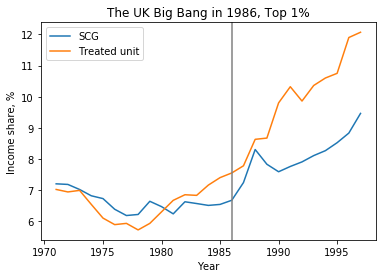

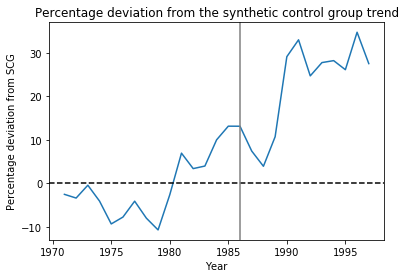

In [156]:
plt.title("The UK Big Bang in 1986, Top 1%")
plt.ylabel('Income share, %')
plot_path(dataprep_1_uk, synth_1_uk, 1986, range(1971,1998))
plt.title("Percentage deviation from the synthetic control group trend")
plot_gaps_percentage(dataprep_1_uk,synth_1_uk, 1986, range(1971,1998))

***
## *Robustness Checks* <a class="anchor" id="robust"></a>
***

#### *Placebo test for top one per cent income shares* <a class="anchor" id="placebo"></a>
For the placebo tests, we assign a SCG to each country for which data is available. Then the root squared mean of the gaps of the post-treatment fit is divided by the root squared mean of the gaps in the pre-treatment period. 

In the following we replicate graphical placebo test. **For the results to be significant at the 10 per cent level, all treated results have to be the most extreme in the sample (since all samples include fewer than 20 country observations), see section 5.3 in the presented paper for further discussions.**

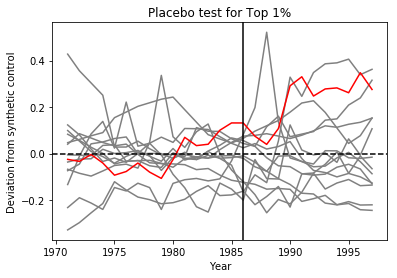

In [157]:
t=[1,2,3,4,5,6,7,8,9,10,11,15,16,17]
t1=[1,2,3,4,5,6,7,8,9,10,11,15,16]
for i in t1: 
    dataprep_out=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982,1985), "Top1P", "ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))  
    synth_out=synth(dataprep_out)
    gaps_percentage_out = gaps_percentage(dataprep_out,synth_out)
    plt.plot(range(1971,1998), gaps_percentage_out, color='grey')
gaps_percentage_out_uk=gaps_percentage(dataprep_1_uk, synth_1_uk)
plt.plot(range(1971,1998),gaps_percentage_out_uk, color="red", label='UK' )
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=1986, color="black", linestyle='-')
plt.ylabel('Deviation from synthetic control')
plt.xlabel('Year')
plt.title("Placebo test for Top 1%")
plt.show()

The red solid line represents the percentage deviation of top one percent income shares in the UK from its baseline SCG. Each of the grey lines represents a gap between the true outcome and the SCG for every country in the donor pool.

The graph shows that the relative deviations of the top one per cent income shares to its SCG belong to one of the extreme values after the Big Bang. The gaps in the pre-treatment period are close to zero, reassuring a good match. The combination of a good fiz in the pre-tretament period and the sharp increase of the relative gaps in the post-treatment period provide a credible result for the top one per cent income shares. However, the values are not the most extreme and are only close to pass the placebo test. Hence, Tanndal and Waldenström conclude that the results are not robustly significant, however close to significant (see for more discussion the section 5.3 in the presented paper).

#### *Changing the pre-treatment period and control variables* <a class="anchor" id="vars-years-check"></a>

A potential concern with the SCM results is that they are sensitive to the selection of variables used to construct SCGs. Due to overfitting it is not possible to control for all possible variables. Therefore, the authors provide robustness tests of 21 different variables in 40 combinations for three different sets of years in order to choose control variables. This creates 120 potential SCGs which allows to check statistical significance of the chosen baseline model. For the sake of time and space limitations, we present five different alternatives to construct a SCGs (see Appendix A3 and Table A3 and A4 of the presented paper for further explanation and results).

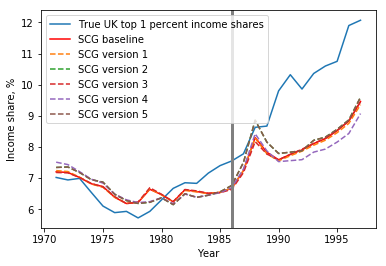

In [158]:
dataprep_uk_baseline=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982,1985), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,7,8,9,10,11,15,16), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_baseline=synth(dataprep_uk_baseline)

dataprep_uk_v1=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1973,1975,1977,1979,1981,1983,1985), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,7,8,9,10,11,15,16), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_v1=synth(dataprep_uk_v1)

dataprep_uk_v2=dataprep(r_dfUK, ("TaxIndICP", "growth", "GDPPCcur", "exports", "imports", "GDPPCcons", "rightwing", "Unemp", "current_quinn","capital_quinn", "epl", "uc",
                        "TopIncomeTaxRate", "cellphone", "ger_mom", "uk_mom", "rule_law", "SM_cap_2panel"), "mean", 
                        (1971,1973,1975,1977,1979,1981,1983,1985), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,8,9,10,15), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_v2=synth(dataprep_uk_v2)

dataprep_uk_v3=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1979,1982,1984,1986), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,7,8,9,10,11,15,16), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_v3=synth(dataprep_uk_v3)

dataprep_uk_v4=dataprep(r_dfUK, ("TaxIndICP", "growth", "GDPPCcur", "exports", "imports", "GDPPCcons", "ka_open", "rightwing", "Unemp", "current_quinn","capital_quinn", "epl", "uc",
                        "TopIncomeTaxRate", "cellphone", "ger_mom", "uk_mom", "rule_law", "SM_cap_2panel"), "mean", 
                        (1979,1982,1984,1986), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,8,9,10,11,15), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_v4=synth(dataprep_uk_v4)

dataprep_uk_v5=dataprep(r_dfUK, ("TaxIndICP", "growth", "GDPPCcur", "exports", "imports", "GDPPCcons", "rightwing", "Unemp", "current_quinn","capital_quinn", "epl", "uc",
                        "TopIncomeTaxRate", "cellphone", "ger_mom", "uk_mom", "rule_law", "SM_cap_2panel"), "mean", 
                        (1971,1976,1979,1982,1985), "Top1P", "ccode", "Country",  "year", 17, (1,2,3,4,5,6,8,9,10,15), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_uk_v5=synth(dataprep_uk_v5)

plt.plot(range(1971,1998), dataprep_uk_baseline.rx2("Y1plot"), label='True UK top 1 percent income shares')
plt.plot(range(1971,1998), dataprep_uk_baseline.rx2("Y0plot").dot(synth_uk_baseline.rx2("solution.w")), color="red", label='SCG baseline')
plt.plot(range(1971,1998), dataprep_uk_v1.rx2("Y0plot").dot(synth_uk_v1.rx2("solution.w")),linestyle='--', label='SCG version 1')
plt.plot(range(1971,1998), dataprep_uk_v2.rx2("Y0plot").dot(synth_uk_v2.rx2("solution.w")),linestyle='--', label='SCG version 2')
plt.plot(range(1971,1998), dataprep_uk_v3.rx2("Y0plot").dot(synth_uk_v3.rx2("solution.w")),linestyle='--', label='SCG version 3')
plt.plot(range(1971,1998), dataprep_uk_v4.rx2("Y0plot").dot(synth_uk_v4.rx2("solution.w")),linestyle='--', label='SCG version 4')
plt.plot(range(1971,1998), dataprep_uk_v5.rx2("Y0plot").dot(synth_uk_v5.rx2("solution.w")),linestyle='--', label='SCG version 5')
plt.axvline(x=1986, color="grey", linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Income share, %')
plt.legend()
plt.show()

From the graph we can notice that the baseline synthetic trend lies in the middle of the span of alternative control specifications. This suggests that the results are no driven by the choice of control variables.

#### *Distributional effects: Gini and GDP per capita* <a class="anchor" id="distribution-effect"></a>

While the the authors show that the Big Bang accounts for an increase in the top income shares, it is natural to ask wether it had caused a decrease in the lower income percentiles. To analyze the relationship between financial market deregulation and the evolution of income inequality, Tanndal and Waldenström run a seperate analysis with the pre-tax income Gini (Market income Gini) coefficient from the Standardized World Income Inequality Database (SWIID) and post-tax income Gini coefficient (Disposable income Gini) from the World Income Inequality Database (WIID) datasets as an outcome. They further investigate the "devision of the pie", asking to what extent the increase in top income shares represents a reallocation of previously existing funds towards the top, or a skewed allocation of new funds torwards the upper income shares. Therefore, they repeat the excersise with GDP per capita as an outcome. They find that both, the pre- and post-tax Gini coefficient increase after the Big Bang while the GDP per capita remains constant. In the following we replicate these findings.

#### *Gini* <a class="anchor" id="gini"></a>

In [159]:
#We load the data with the gini_net (post-fisc Gini) and gini_market (pre-fisc )
#df_gini=pd.read_csv('Final_Data\\AlldataUK_gini.csv') #use data first imported dfUK
df_gini=pd.read_csv(os.path.join(project_path,"Final_Data","AlldataUK_gini.csv")) #use data first imported dfUK
r_df_gini = pandas2ri.py2ri(df_gini)
df_gini.head()

,Country,year,Top10,Top5,Top1,Top01,Top10Can,Top5Can,Top1Can,Top01Can,...,gini_market_95lb,rel_red,rel_red_se,rel_red_95ub,rel_red_95lb,abs_red,abs_red_se,abs_red_95ub,abs_red_95lb,ccode
0,Australia,1971,28.24,17.59,5.920000099999999,1.25,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
1,Australia,1972,27.799999,17.5,6.0599999,1.29,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
2,Australia,1973,26.74,16.73,5.670000099999999,1.17,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1
3,Australia,1974,25.870001000000002,15.87,5.2199998,1.0599999,nan,nan,nan,nan,...,24.313837,nan,nan,nan,nan,nan,nan,nan,nan,1
4,Australia,1975,25.540001,15.65,5.130000099999999,1.1,nan,nan,nan,nan,...,24.377266,30.070349,1.9139539,33.821697,26.318997999999997,7.921301799999999,0.62837434,9.152916000000001,6.6896882,1


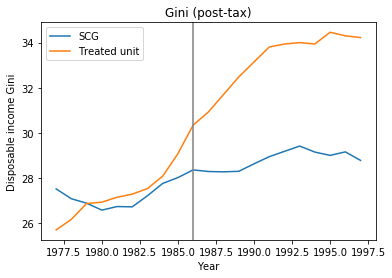

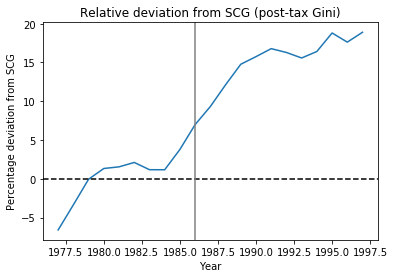

   w.weights unit.names unit.numbers

2      0.659     Canada            2

8      0.031      Italy            8

9      0.310      Japan            9

15     0.000     Sweden           15



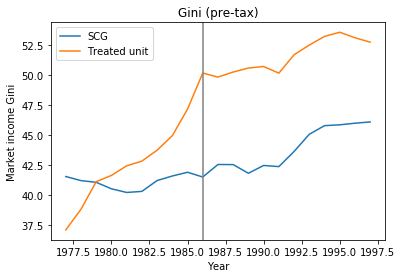

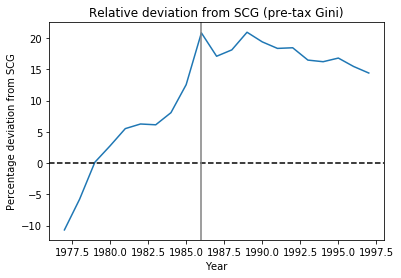

   w.weights unit.names unit.numbers

2      0.634     Canada            2

8      0.366      Italy            8

9      0.000      Japan            9

15     0.000     Sweden           15



In [160]:
#Next steps are similar to the steps in main results part of the project. Due to missing data we had to exclude some countries from the donor pool and took 1977-1986 for pre-treatment optimization period

dataprep_gini_n=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price"), 
                     "mean", (1977,1979,1982,1986), "gini_net", "ccode", "Country",  "year", 17, (2,8,9,15), robjects.r.seq(1977, 1986), robjects.r.seq(1977, 1997))
synth_gini_n=synth(dataprep_gini_n)
plt.title("Gini (post-tax)")
plt.ylabel('Disposable income Gini')
plot_path(dataprep_gini_n, synth_gini_n, 1986, range(1977,1998)) 
plt.title("Relative deviation from SCG (post-tax Gini)")
plot_gaps_percentage(dataprep_gini_n,synth_gini_n, 1986, range(1977,1998))
weights(dataprep_gini_n,synth_gini_n)

dataprep_gini_m=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1977,1979,1982,1986), "gini_market", "ccode", "Country",  "year", 17, (2,8,9,15), robjects.r.seq(1977, 1986), robjects.r.seq(1977, 1997))
synth_gini_m=synth(dataprep_gini_m)
plt.title("Gini (pre-tax)")
plt.ylabel('Market income Gini')
plot_path(dataprep_gini_m, synth_gini_m, 1986, range(1977,1998)) 
plt.title("Relative deviation from SCG (pre-tax Gini)")
plot_gaps_percentage(dataprep_gini_m,synth_gini_m, 1986, range(1977,1998))
weights(dataprep_gini_m,synth_gini_m)

The representation of the gaps shows that the effect of the Big Bang on the pre- and post-tax Gini coefficient was substantial. In line with the paper of Tandall and Waldenström,  We can further conclude that the results for the post-tax Gini coefficient are more pronounced.

> #### *Placebo test - post-tax Gini*

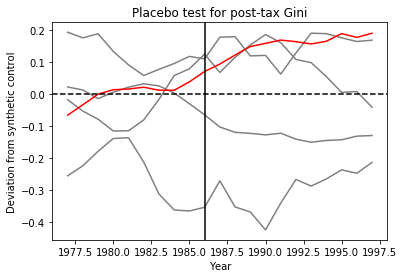

In [161]:
t=[2,8,9,15,17]
t1=[2,8,9,15]
for i in t1: 
    dataprep_out=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1977,1979,1982,1986), "gini_net", "ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1977, 1986), robjects.r.seq(1977, 1997))  
    synth_out=synth(dataprep_out)
    gaps_percentage_out = gaps_percentage(dataprep_out,synth_out)
    plt.plot(range(1977,1998), gaps_percentage_out, color='grey')
gaps_percentage_out_uk=gaps_percentage(dataprep_gini_n, synth_gini_n)
plt.plot(range(1977,1998),gaps_percentage_out_uk, color="red", label='UK' )
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=1986, color="black", linestyle='-')
plt.ylabel('Deviation from synthetic control')
plt.xlabel('Year')
plt.title("Placebo test for post-tax Gini")
plt.show()

> #### *Placebo test - pre-tax Gini*

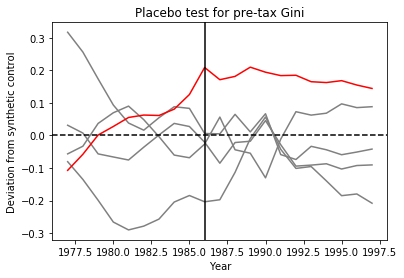

In [162]:
t=[2,8,9,15,17]
t1=[2,8,9,15]
for i in t1: 
    dataprep_out=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1977,1979,1982,1986), "gini_market", "ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1977, 1986), robjects.r.seq(1977, 1997))  
    synth_out=synth(dataprep_out)
    gaps_percentage_out = gaps_percentage(dataprep_out,synth_out)
    plt.plot(range(1977,1998), gaps_percentage_out, color='grey')
gaps_percentage_out_uk=gaps_percentage(dataprep_gini_m, synth_gini_m)
plt.plot(range(1977,1998),gaps_percentage_out_uk, color="red", label='UK' )
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=1986, color="black", linestyle='-')
plt.ylabel('Deviation from synthetic control')
plt.xlabel('Year')
plt.title("Placebo test for pre-tax Gini")
plt.show()

The post-tax Gini coefficient exposes one of the most extreme values while the pre-tex Gini coefficient esposes the most extreme value in the post treatment period. While it seems that the increase for the pre-tax Gini coefficent is more clear relatively to the post-tax Gini coefficient, one has to consider the quality of the fit in the pre-treatment period. Even though the increase in the post-tex Gini coefficient is smaller, it has a far better match for the pre-treatment period since the gaps are close to zero. Considering the pre- and post-treatment results on the test, we can conclude that the results are more credible for the post-tax Gini coefficient. This clear increase for the post-tax Ginicoefficient might be driven by the fact that there was a substantial decrease in the top income tax rates right after the Big Bang. 

#### *GDP per capita*  <a class="anchor" id="gdppc"></a>

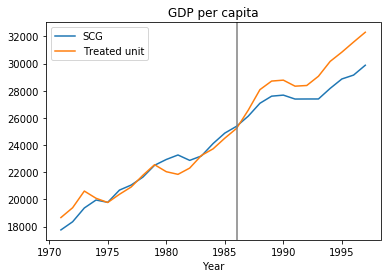

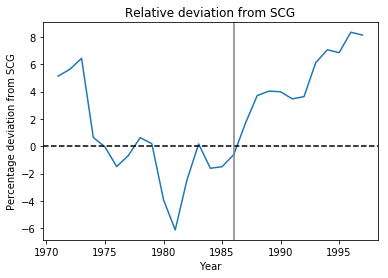

   w.weights unit.names unit.numbers

2      0.451     Canada            2

8      0.448      Italy            8

9      0.019      Japan            9

15     0.083     Sweden           15



In [163]:
# Next steps are similar to the steps in main results part of the project. Due to missing data we had to exclude some countries from the donor pool and took 1977-1986 for pre-treatment optimization period
dataprep_gdp=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982), "GDPPCcons", "ccode", "Country",  "year", 17, (2,8,9,15), robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))
synth_gdp=synth(dataprep_gdp)
plt.title("GDP per capita")
plot_path(dataprep_gdp, synth_gdp, 1986, range(1971,1998)) 
plt.title("Relative deviation from SCG")
plot_gaps_percentage(dataprep_gdp,synth_gdp, 1986, range(1971,1998))
weights(dataprep_gdp,synth_gdp)

The above graphs show that there was no substantial increase of the GDP after the Big Bang. 

> #### *Placebo test - GDP per capita*

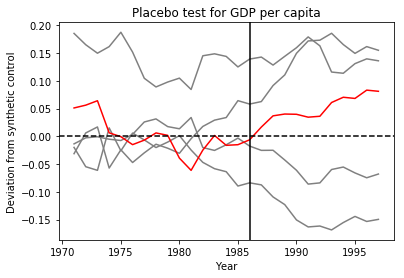

In [164]:
t=[2,8,9,15,17]
t1=[2,8,9,15]
for i in t1: 
    dataprep_out=dataprep(r_df_gini, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982), "GDPPCcons", "ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1971, 1986), robjects.r.seq(1971, 1997))  
    synth_out=synth(dataprep_out)
    gaps_percentage_out = gaps_percentage(dataprep_out,synth_out)
    plt.plot(range(1971,1998), gaps_percentage_out, color='grey')
gaps_percentage_gdp_uk=gaps_percentage(dataprep_gdp, synth_gdp)
plt.plot(range(1971,1998),gaps_percentage_gdp_uk, color="red", label='UK' )
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=1986, color="black", linestyle='-')
plt.ylabel('Deviation from synthetic control')
plt.xlabel('Year')
plt.title("Placebo test for GDP per capita")
plt.show()

The graphical placebo test shows that the GDP-per capita does not pass the test. In line with the presented paper, we can confirm that there was no significant effect of the Big Bang on the GDP per capita.

While the Gini coefficient increased after the Big Bang the GDP per capita raemained relatively constant. The authors of the presented paper interprete these findings as an indicator for a shift in the "distribution of the pie" in favour of the top in come earners. One explanation for this could be the mentioned firm size effect whereby the Big Bang enabled large firms to expand more easily and influence the managerial structure compared to smaller firms (Gibson, 2000; Cuñat and Guadalupe, 2009). Hence, the larger firms were able to gain more power in the market and buy out smaller firms.

***
## *Extention of the paper* <a class="anchor" id="extention"></a>
***

In the following we would like to build up on the results of Tandall and Waldenström and extend the analysis by two ideas. First, we estimate the impact of the Big Bang on the middle 40 and the lower 50 per cent of the income distribution, using the SCM. Second, because the agreement on the vast financial deregulations was reached already in 1983, we analyse the possibility of an anticipation effect in the years after the agreement until the implementation of the Big Bang.

#### *Middle 40 and lower 50 percentile of the income distribution* <a class="anchor" id="middlelower"></a>

Eventhough the authors run the analysis using a broader measure of inequality, they do not show the underlying dynamics for the lower income shares after the Big Bang. Yet, it might be interesting to see if and how lower pecentiles of the income distribution were affected by the Big Bang. Thus, we include the analysis for the middle 40 and the lower 50 per cent income shares. We extract the data from the WID data base. Unfortunately, the data for the lower income shares is not available for the main donor countries of the UK but Ireland. There is no data for Australia, Canada and Japan or New Zealand. The data is available for Denmark but is insufficient for an appropriate match. Thus, the donor pool reduced to 8 countries (Ireland, Finland, France, Germany, Italy, Netherlands, Sweden, Switzerland). Moreover, it was not possible to include other countries into the donor pool because of insufficient data availability or comparability for the control variables. As a result, it is clear that the SCG for the UK will differ substantially compared to the analysis above.

In [165]:
# Read in data of middle 40 and lower 50 percentile of the distribution from WID data base
#dfWID = pd.read_csv(project_path+"\\Final_Data\\WID_data.csv")
dfWID = pd.read_csv(os.path.join(project_path,"Final_Data","WID_data.csv"))
dfWID.head()

,Country,year,lower,middle
0,Denmark,1972,nan,nan
1,Denmark,1973,nan,nan
2,Denmark,1974,nan,nan
3,Denmark,1975,nan,nan
4,Denmark,1976,nan,nan


In [166]:
# Merge the data with the dfUK data frame
dfUK_WID = pd.merge(dfUK, dfWID, how='inner', left_on = ['Country', 'year'], right_on = ['Country', 'year'])

# Shares to percentages
dfUK_WID['middle'] = dfUK_WID['middle']*100; #from share to %
dfUK_WID['lower'] = dfUK_WID['lower']*100;

round(dfUK_WID.head(), 2)

,Country,year,ccode,Top10,Top5,Top1,Top01,Top10Can,Top5Can,Top1Can,...,stocks,leftwing,Top10_5,Top10_1,Top10_01,Top5_1,Top5_01,Top1_01,lower,middle
0,Denmark,1972,3,32.27,21.16,8.24,2.26,nan,nan,nan,...,2.7,0,11.11,24.03,30.01,12.92,18.9,5.98,nan,nan
1,Denmark,1973,3,32.02,20.91,nan,nan,nan,nan,nan,...,4.23,0,11.11,24.24,29.96,13.14,18.86,5.72,nan,nan
2,Denmark,1974,3,30.58,19.65,7.31,1.85,nan,nan,nan,...,3.14,0,10.93,23.27,28.73,12.34,17.8,5.46,nan,nan
3,Denmark,1975,3,29.51,18.76,6.8,1.69,nan,nan,nan,...,3.47,0,10.75,22.71,27.82,11.96,17.07,5.11,nan,nan
4,Denmark,1976,3,29.13,18.44,6.62,nan,nan,nan,nan,...,4.51,1,10.69,22.51,27.54,11.82,16.85,5.03,nan,nan


In [167]:
dfUK_WID_top1 = pd.pivot_table(dfUK_WID, index=['year'], columns=['Country'], values=['Top1']).reset_index()
dfUK_WID_top1 = dfUK_WID_top1[(dfUK['year'] > 1979)];
#| dfUK_WID_top1['Countries'] == 'Australia']
dfUK_WID_top1.head()

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


year    Top1                                                          \
Country       Denmark Finland France Germany Ireland Italy Netherlands Norway   
9        1980    5.47    4.32   7.63   10.43    6.65   6.9         nan    4.6   
10       1981    5.38    3.96   7.55     nan    6.37  6.47        5.85   4.47   
11       1982    5.21    3.55   7.07     nan    6.87   6.4         nan   4.43   
12       1983    5.27    3.49   6.99    9.06    7.05  6.34         nan   4.42   
13       1984    5.26    4.11   7.03     nan     6.5  6.54         nan   4.39   

                                           
Country Sweden Switzerland United Kingdom  
9         4.05         nan            nan  
10        3.97         8.4           6.67  
11        3.98         nan           6.85  
12        4.08        8.39           6.83  
13        4.13         nan           7.16

In [168]:
dfUK_WID_top1 = pd.pivot_table(dfUK_WID, index=['year'], columns=['Country'], values=['Top1']).reset_index()
dfUK_WID_top1 = dfUK_WID_top1[(dfUK['year'] > 1979)];

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [169]:
dfUK_WID_middle = pd.pivot_table(dfUK_WID, index=['year'], columns=['Country'], values=['middle']).reset_index();
dfUK_WID_middle = dfUK_WID_middle[(dfUK['year'] > 1979)];
dfUK_WID_lower = pd.pivot_table(dfUK_WID, index=['year'], columns=['Country'], values=['lower']).reset_index();
dfUK_WID_lower = dfUK_WID_lower[(dfUK['year'] > 1979)];

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


The following graphs present the evolution of the top one, middle 40 and lower 50 per cent income shares for the UK and all available donor countries. Graphically it is clear that while the top one income shares increase in the UK above all other countries, the lower income shares are clearly decreasing and are below all other donor countries. However, this trend is evident in the pre- and post-treatment period. This shows two things. First, the top one income shares sharply increased in the UK after the Big Bang while the lower income shares have been decreasing steadily. Second, it shows that the post-treatment trends seem to have started already before the treatment for all icome shares. However, it is true that the top one income shares of the UK increase more radically than the lower income shares decrease relatively to all the other countries. This provides a ground to believe that the evoling trends after the Big Bang have already started in the past and other (missing) confounders are driving the results (see section "Discussion of the Underlying Assumptions" above). Consequently, the estimated outcomes especially for the lower income shares should be taken with a grain of salt. 

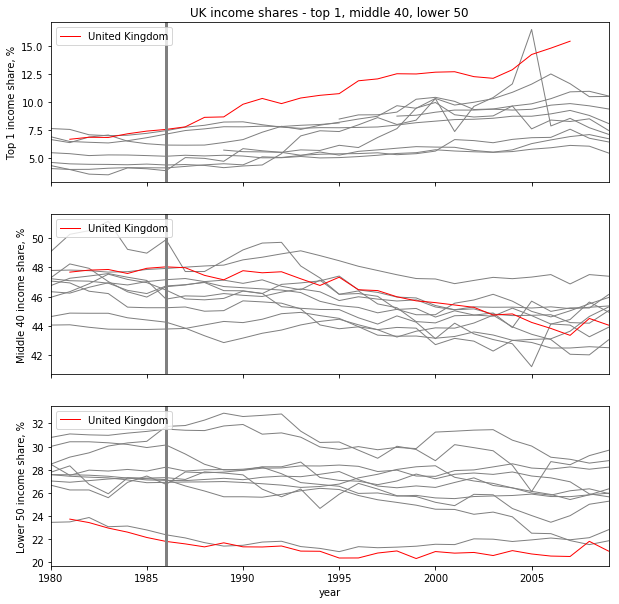

In [170]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10,10))

colours = ['grey']*10 + ['red']
dfUK_WID_top1.plot(x = 'year', y = 'Top1', color = colours, linewidth = 1, ax = ax1) 
ax1.set_title('UK income shares - top 1, middle 40, lower 50')
ax1.set_ylabel('Top 1 income share, %')
ax1.set_xlabel('year');
ax1.axvline(1986, c='grey', linewidth = 3)
handles1, labels1 = ax1.get_legend_handles_labels()
uk_index = labels1.index('United Kingdom')
ax1.legend([handles1[uk_index]], [labels1[uk_index]], loc='upper left');

dfUK_WID_middle.plot(x = 'year', y = 'middle', color = colours, linewidth = 1, ax = ax2) 
ax2.set_ylabel('Middle 40 income share, %')
ax2.axvline(1986, c='grey', linewidth = 3)
handles2, labels2 = ax2.get_legend_handles_labels()
uk_index = labels2.index('United Kingdom')
ax2.legend([handles2[uk_index]], [labels2[uk_index]], loc='upper left');

dfUK_WID_lower.plot(x = 'year', y = 'lower', color = colours, linewidth = 1, ax = ax3) 
ax3.set_ylabel('Lower 50 income share, %')
ax3.axvline(1986, c='grey', linewidth = 3);
handles3, labels3 = ax3.get_legend_handles_labels()
uk_index = labels3.index('United Kingdom')
ax3.legend([handles3[uk_index]], [labels3[uk_index]], loc='upper left');

 #### *Middle 40*  <a class="anchor" id="middle"></a>

In [171]:
# Format data
dfUK_WID = dfUK_WID.reset_index()

In [172]:
r_dfUK_WID = pandas2ri.py2ri(dfUK_WID)

The selection of the pre-treatment years for the matching is guided by the data availability of the middle 40 per cent income shares. 

In [173]:
# Prepare data for UK to use in sytnth() sunction 
dataprep_out_middle = dataprep_out_uk=dataprep(r_dfUK_WID, ("middle", "growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1981, 1982, 1985), "middle", "ccode", "Country",  "year", 17, (4,5,6,7,8,10,15,16), robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))

In [174]:
# Use synth function to calculate optimal weights
synth_out_middle=synth(dataprep_out_middle)

In [175]:
weights(dataprep_out_middle,synth_out_middle)

   w.weights  unit.names unit.numbers

4      0.099     Finland            4

5      0.000      France            5

6      0.000     Germany            6

7      0.206     Ireland            7

8      0.000       Italy            8

10     0.695 Netherlands           10

15     0.000      Sweden           15

16     0.000 Switzerland           16



The table above shows the optimal weights for the donor countries. The weighted average of the countries Netherlands (0.695), Ireland (0.206) and Finland (0.099) constitutes the optimal SCG for the middle 40 per cent income shares of the UK.  

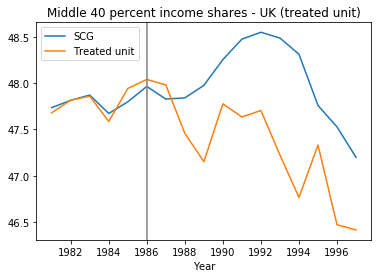

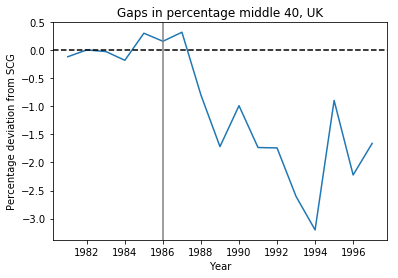

In [176]:
# Plotting the outcome: gaps UK and SCG
plt.title("Middle 40 percent income shares - UK (treated unit)")
plot_path(dataprep_out_middle, synth_out_middle, 1986, range(1981,1998))
plt.title("Gaps in percentage middle 40, UK")
plot_gaps_percentage(dataprep_out_middle,synth_out_middle, 1986, range(1981,1998))

The first graph shows the evolution of the middle 40 per cent income shares of the UK and its optimal SCG. The drop in the middle 40  per cent income shares after the Big Bang is more pronounced for the UK than its SCG. In the last year presented, 1988, the difference between the UK and its SCG amounts to one percentage point. While the middle 40 per cent share of the income distribution decreases from 48 per cent to roughly 46 per cent, the SCG decreases from 47.8 to roughly 47.1 percent. As a results the difference between the decrease in the UK and the SCG amounts to treatment effect amounts 1.3 percentage-points. We can therefore conclude that the middle 40 income shares decreased by approximately one percentage point relative to the SCG. This decrease is then the *ATT* attributed to the Big Bang. The second graph shows the gaps as a percentage of the outcome of the SCG.

> #### *Placebo tests for middle 40*

In [177]:
dataprep_out_middle1= dataprep_out_uk=dataprep(r_dfUK_WID, ("middle", "growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1980, 1982, 1985), "middle", "ccode", "Country",  "year", 17, (4,5,6,7,8,10,15,16), robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))

synth_out_middle1=synth(dataprep_out_middle1)
gaps_percentage_out_middle = gaps_percentage(dataprep_out_middle1,synth_out_middle1)

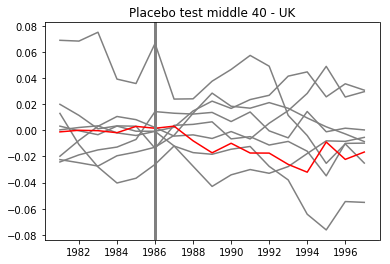

In [178]:
t=[4,5,6,7,8,10,15,16,17]
t1=[4,5,6,7,8,10,15,16]
for i in t1:
    dataprep_out_m=dataprep(r_dfUK_WID, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1981,1982,1985), "middle","ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))  
    synth_out_m=synth(dataprep_out_m)
    gaps_percentage_out_m = gaps_percentage(dataprep_out_m,synth_out_m)
    plt.plot(range(1981,1998), gaps_percentage_out_m, color='grey')
gaps_percentage_out_middle=gaps_percentage(dataprep_out_middle, synth_out_middle)
plt.plot(range(1981,1998),gaps_percentage_out_middle, color="red", label='UK' ); 
plt.axvline(1986, c='grey', linewidth = 3);
plt.title("Placebo test middle 40 - UK");

In the graph above, the UK exposes the third lowest percentage gaps. We can therefore conclude that the results for the middle 40 per cent income shares do not pass the graphical placebo test. Hence, the results are not significant at any conventional significance level.

#### *Lower 50* <a class="anchor" id="lower"></a>

Same as for the middle 40 per cent income shares, the selection on the pre-treatment years for the matching is guided by the data availability of the lower 50 per cent income shares. Because of insufficient data availability, the pre-treatment years for the match reduce to three years only: 1981, 1982, 1985. 

In [179]:
# Prepare the data
dataprep_out_lower=dataprep(r_dfUK_WID, ("lower", "growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1981, 1982, 1985), "lower","ccode", "Country",  "year", 17, (4,5,6,7,8,10,15,16), robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))

In [180]:
# Use synth function to calculate optimal weights
synth_out_lower=synth(dataprep_out_lower)

In [181]:
weights(dataprep_out_lower, synth_out_lower)

   w.weights  unit.names unit.numbers

4          0     Finland            4

5          1      France            5

6          0     Germany            6

7          0     Ireland            7

8          0       Italy            8

10         0 Netherlands           10

15         0      Sweden           15

16         0 Switzerland           16



The table above shows the optimal weights for the donor countries. Thereby, only France is chosen as a donor country in the optimal SCG. This is usually a sign of a bad match due to insufficient data. Because of data availability we could only include 8 donor countries and three pre-treatment years for the matching (see above).   

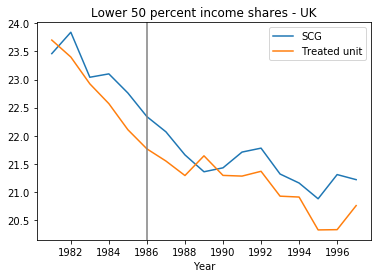

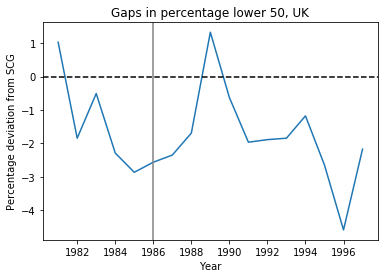

In [182]:
# Plot evolution of the income shares UK and SCG, and gaps
plt.title("Lower 50 percent income shares - UK")
plot_path(dataprep_out_lower, synth_out_lower, 1986, range(1981,1998))
plt.title("Gaps in percentage lower 50, UK")
plot_gaps_percentage(dataprep_out_lower, synth_out_lower, 1986, range(1981,1998))

As before, the first graph shows the evolution of the lower 50 per cent income shares of the UK and its optimal SCG. For the lower 50 per cent income shares the trends of the UK and its SCG are more similar after the Big Bang such that there is no significant decrease after the treatment period. The second graph shows further, that the gaps are far from zero in the pre-treatment period, pointing to a low quality of the match due to missing confounders or insufficient data for the lower 50 per cent income shares. The gaps first increase after the pre-treatment period and decrease only some years after the treatment. Yet, the first graph shows a clear downwards trend for the UK and its SCG. So, let us look at the graphical placebo tests for the lower 50 per cent income shares. 

> #### *Placebo test for lower 50*

In [183]:
# Prepare the data
dataprep_out_lower1=dataprep(r_dfUK_WID, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                    "mean", (1980, 1982,1985), "lower","ccode", "Country",  "year", 17, (4,5,6,7,8,10,15,16), robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))  
synth_out_lower1=synth(dataprep_out_lower1)
gaps_percentage_out_lower = gaps_percentage(dataprep_out_lower1,synth_out_lower1)

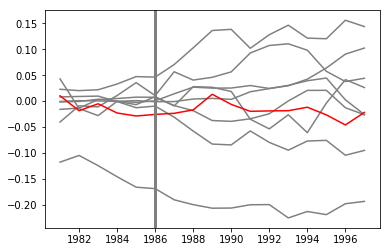

In [184]:
# Graphical placebo test
t=[4,5,6,7,8,10,15,16,17]
t1=[4,5,6,7,8,10,15,16]
for i in t1:
    dataprep_out_l=dataprep(r_dfUK_WID, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                    "mean",  (1981,1982,1985), "lower","ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1981, 1986), robjects.r.seq(1981, 1997))  
    synth_out_l=synth(dataprep_out_l)
    gaps_percentage_out_l = gaps_percentage(dataprep_out_l,synth_out_l)
    plt.plot(range(1981,1998), gaps_percentage_out_l, color='grey')
gaps_percentage_out_lower=gaps_percentage(dataprep_out_lower, synth_out_lower)
plt.plot(range(1981,1998),gaps_percentage_out_lower, color="red", label='UK' ); 
plt.axvline(1986, c='grey', linewidth = 3);

Similar to the middle 40 per cent income shares, the percentage gaps for the UK do no seem to be the most extreme and hence do not pass the placebo test. We can conclude that the decrease in the lower income shares is not significant and therefore cannot be attributed to the effect of the Big Bang. As a result, the decrease is likely to be driven by other economic factors, e.g., other economic policies. 

#### *Anticipation effect* <a class="anchor" id="anticipation"></a>

We further analyse the existence of a possible anticipation effect. Eventhough the Big Bang was implemented in 1986, the agreement was reached already three years before, in 1983. In the UK, the Big Bang "[...] has beed regarded as one of the crowning achievements of the Conservative government led by Mrs Thatcher, providing the foundation for the City of London's reemergence as the leading international financial centre" (Bellringer and Michie 2014). On this background, we construct a SCG based on the years prior to 1983. Because the alternative construction of the optimal SCG on the years under the Tratcher regime did not show a better match (see Apendix A3 and Table A4 in the presented paper), we keep the baseline specification of the control variables and pre-treatment period until the year of agreement. Because the Big Bang was implemented to increase the efficiency of the financial market in the UK, we expect the anticipation effect to be positive. Hence, the top one per cent income shares are expected already to increase after the agreement in 1983. 

In [185]:
# Format data
r_dfUK = pandas2ri.py2ri(dfUK)

To analyse the possibility of an anticipation effect, we again focus on the top one per cent income shares. As already mentioned before, we use the same pre-treatment years as in the baseline scenario to match the UK to its SCG. We only leave out the last year 1985, since we the agreement was in already reached in 1983. However, because of data availability we have to include the year 1983 as well for the matching. This might be acceptable since the agreement was reached in the middle of the year 1983 instead of the beginning and if we believe that the news of the future financial deregulation needed some time to spread in public. Hence, the new treatment period, the year where the agreement of the Big Bang became public is set to 1984. 

In [186]:
# Prepare data for UK to use in sytnth() sunction 
dataprep_out_uk_anti = dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                    "mean",  (1971,1976,1979,1982,1983), "Top1P","ccode", "Country",  "year", 17, (1,2,3,4,5,6,7,8,9,10,11,15,16), robjects.r.seq(1971, 1984), robjects.r.seq(1971, 1997))

In [187]:
# Use synth function to calculate optimal weights
synth_out_uk_anti=synth(dataprep_out_uk_anti)

In [188]:
weights(dataprep_out_uk_anti,synth_out_uk_anti)

   w.weights  unit.names unit.numbers

1      0.399   Australia            1

2      0.332      Canada            2

3      0.000     Denmark            3

4      0.000     Finland            4

5      0.000      France            5

6      0.000     Germany            6

7      0.269     Ireland            7

8      0.000       Italy            8

9      0.000       Japan            9

10     0.000 Netherlands           10

11     0.000 New Zealand           11

15     0.000      Sweden           15

16     0.000 Switzerland           16



It is reassuring to see that the SCM selected the same donor countires as in the baseline, Australia (0.399), Canada (0.332) and Ireland (0.269), even though with slightly different weights. 

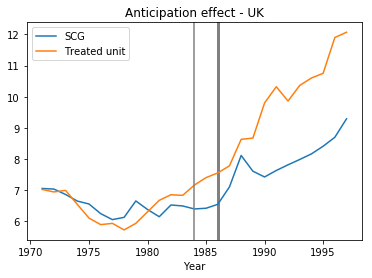

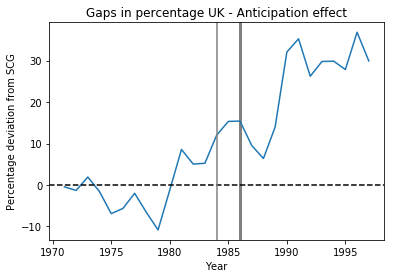

In [189]:
# Evolution of the income shares of UK and SCG, and gaps'
plt.title("Anticipation effect - UK")
plt.axvline(1986, c='grey', linewidth = 3);
plot_path(dataprep_out_uk_anti, synth_out_uk_anti, 1984, range(1971,1998))
plt.axvline(1986, c='grey', linewidth = 3);
plt.title("Gaps in percentage UK - Anticipation effect")
plot_gaps_percentage(dataprep_out_uk_anti,synth_out_uk_anti, 1984, range(1971,1998))

In the first graph we see the evolution of the top income shares of the UK and its SCG. The thin vertical, grey line marks the year after the agreement, 1984 while the thick grey line marks the year of the actual implementation of the Big Bang, 1986. We can see that within the years 1994 and 1996, the increase for the UK is steeper than for its SCG. The increase in the UK amounts to almost one percentage-point, from roughly 7 to 7.8 per cent while the increase for the SCG approximately amounts to 0.1 percentage-points. This results in an net increase of roughly 0.7 percentage-points which can be attributed to the Big Bang. Further, the percentage gaps increase visibly in the same time period, they increase from approximately 14 per cent to 16 per cent. 

> #### *Placebo test for anticipation effect*

In [190]:
# Prepare data for the placebo test
dataprep_out_anti1=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                   "mean",  (1971,1976,1979,1982,1983), "Top1P","ccode", "Country",  "year", 17, (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 10, 15, 16), robjects.r.seq(1971, 1984), robjects.r.seq(1971, 1997))  
synth_out_anti1=synth(dataprep_out_anti1)
gaps_percentage_out_anti = gaps_percentage(dataprep_out_anti1,synth_out_anti1)

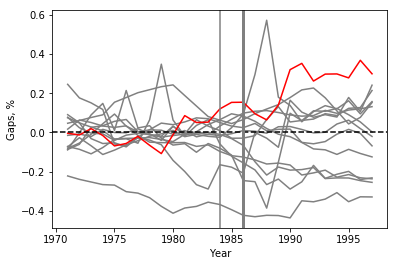

In [191]:
# Graphical placebo test
t=[1,2,3,4,5,6,7,8,9,10,11,15,16,17]
t1=[1,2,3,4,5,6,7,8,9,10,11,15,16]
for i in t1:  
    dataprep_out_anti=dataprep(r_dfUK, ("growth", "GDPPCcons", "rightwing", "uk_mom", "epl", "capital_quinn", "TopIncomeTaxRate", "stock_price", "SM_cap_2panel"), 
                     "mean", (1971,1976,1979,1982,1983), "Top1P","ccode", "Country",  "year", i, [x for x in t if x != i], robjects.r.seq(1971, 1984), robjects.r.seq(1971, 1997))  
    synth_out_anti=synth(dataprep_out_anti)
    gaps_percentage_out_anti = gaps_percentage(dataprep_out_anti, synth_out_anti)
    plt.plot(range(1971,1998), gaps_percentage_out_anti, color='grey')
gaps_percentage_out_uk_anti=gaps_percentage(dataprep_out_uk_anti, synth_out_uk_anti)
plt.plot(range(1971,1998),gaps_percentage_out_uk_anti, color="red", label='UK' )
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=1984, color="grey", linestyle='-')
plt.axvline(x=1986, color="grey", linestyle='-', linewidth = 3)
plt.ylabel('Gaps, %')
plt.xlabel('Year')
plt.show()

In contrast to the placebo test for the lower income shares, the increase in the percentage gaps for the top one income shares of the UK are the most extreme from 1984 to 1986, passing the placebo test. Hence, we can conclude that the increase of the top one per cent income shares (of roughly one percentage-point), in the two years after the agreement is significant. This result is in line with our expectations of an positive anticipation effect, reassuring that the financial deregulations were expected to benefit the financial markets and its participants. 

The existance of an anticipation effect proves that the Big Bang impacted the outcome already before its implementation in 1986. This result violates the *A2* of the *CIA*. This violation introduces a potential bias to the estimation of the *ATT*. However, because the anticipation effect shows that the UK acts on the knowledge of the Big Bang, and the control unit is likely to be matched on already changing outcomes, the estimation of the counterfactual state is likely biased upwards. Therefore, the effect of the Big Bang on the top one per cent income shares is likely to be downward-biased and would have been more pronounced in the absence of an anticipation effect. Consequently, this result does not mitigate the effect of the Big Bang on the top one per cent income shares in the UK.

All in all, we can conclude that while there is no significant effect of the Big Bang on the lower income shares, we find convicing evidence which supports the existance of a positive anticipation effect.

***
## *Discussion and Conclusion* <a class="anchor" id="conclusion"></a>
***

This student project was set out to present a relatively new tool of causal inference: The Synthetic Control Method (SCM), developed by Abadie and Gardeazabal (2003) and Abadie, Diamond, and Hainmueller (2010). The SCM was introduced to provide guidance to the researcher on how to systematically construct an optimal counterfactual. The method adresses the two fundamental problems of causal inference: The "missing data" and the selection problem. More specifically, the SCM aims to answer the "what if" questions in causal inference: What would have happened if the treatment would have been absent? Therefore, the quasi-experimental design provides a mechanism on how to select an optimal SCG in comparative case studies to reduce the estimation bias and subjective influences of the researcher.

Despite of being relatively new, the SCM has received a lot of attention in the last years. It has been used in a wide range of fields, e.g., evaluation of terrorism, trade liberalization, natural disasters, health policy etc. The growing importance of the SCM, reflected in the literature, motivates to take a closer look at the underlying mechanism and discuss the fundamental assumptions of the method, fleshing out its benefits and drawbacks in practice. For this purpose, we present and discuss selected results of the paper "Does Financial Deregulation Boost Top Incomes? Evidence from the Big Bang" by Tanndal and Waldenström, published in Economica in 2017. Because this replication excersice could be easily done for Japan and other top income shares, we replicate the outcomes for the top one per cent income shares of the UK. 

Contrasting the SCM to other tools of causal inference, the SCM constitutes a hybrid of the matching and *diff-in-diff* methods. Combining the benefits of both methods, it allows additionally to account for time-variant, unobserved confounders. To validate their estimation strategy, Tandall and Waldenström adress the two fundamental problems of causal inference by employing the *A2* of the *CIA* and the *SUTVA*. Together, the two assumptions provide a necessary and sufficient condition to estimate an unbised *ATT* of the Big Bang on the top one per cent income shares in the UK. Moreover, the SCM provides a data-driven method to select the optimal SCG, based on a convex combination of the pre-treatment characteristics of the donor countries. A combination of comparison units often provides a better comparison for the unit exposed to the intervention than any comparison unit individually. To find the optimal SCG, the SCM minimizes the pre-treatment differences in outcome and other important factors. To implement the SCM in practice, Abadie, Diamond and Hainmueller introduced the a statistical software "synth" that we use to implement our results. 

For the validity of the identification strategy, the *A2* of the *CIA* and the *SUTVA* are essential. However, if the econometric assumptions cannot be backed up by the economic theory, it is not possible to isolate the true effect of the Big Bang and the estimation is biased. The *A2* from the *CIA* requires the potential outcome in the untreated state to be equal for the UK and its SCG. However, the assumption is violated if there are important missing counfounders, affecting the Big Bang and the income shares. Because of missing or unobserved confounders the counterfactual cannnot be matched on the important economic characteristics which might drive the outcome in the post-treatment period. As a result, the effect cannot be solely attributed to the Big Bang. Furthermore, if the comparison units differ in their economic prerequisites, it is likely that they differ in other unobserved confounders, introducing a further bias in the estimation of the *ATT*. <br>
The *SUTVA* is violated when there are spill-over effects and the general equilibirum is affected. Thereby, if the treated country maintains strong interdependencies to other financial markets or if more and more countries select into treatment, it is plausible to expect spill-over effects on the global capital flows. While the authors do not discuss the possibility of a violation of the *SUTVA*, they aim to validate the *A2* from the *CIA*. Therefore, they extend the control variables for the analysis and permute the pre-treatment years for the matching in their robustness checks. The results are shown to be robust. They further validate the parallel assumption for the control variables except for the top income tax rate, admitting that the deviation in the taxation might have had an positive effect on the outcome. However, they claim the effect to be relatively small in comparison to the impact of the Big Bang.

Because there is no common knowledge about the variables that should be included in the analysis, it remains unclear how to assess the plausability of the established causal relationships or the validity of the identification strategy reagarding the missing confounders. Yet, it seems reasonable to assume that spill-over effects are likely and that there are factors which are inadequately represented such as globalization and technological development. However, including more variables does not provide a remedy against the fact that there important confounders, e.g., general global trends and other economic policies, are missing or not captured appropriatly by the data. Another problem with inlcluding more variables is that the data availability is getting likely to get worse since not every variable is available for every country and for the same time periods. While the authors mention that an exact fit of the pre-treatment period is almost impossible, they do not provide an economic motivation for choosing the respective pre-treatment years for the matching. In the extended analysis, data availability was a problem such that only years which contained the full information were chosen. In suchs cases the selection of the pre-treatment years for the matching is dictated by the data availability instead of economic theory. The problem of insufficient guidance on how to choose pre-treatment years for the matching could be extended to the selection of control variables and the donor pool. Therefore, the SCM leaves the researcher alone with the decision on how to select the pre-treatment years and combinations of the control variables to contruct a credible conterfactual. As a result, one should bear in mind the consequences when including or excluding pre-treatment years, economic variabels or donor countries to reach a better fit for the treatment unit. 

Applying the SCM, we can validate the results of the authors: While the top one per cent income shares and the Gini coefficient increased after the Big Bang, the GDP per capita remained constant. Hence, the authors conclude that the income distribution was skewed towards the upper income shares in the post-treatment period. We further can confirm that the results are robust against different constellations of the control variables and the selection of pre-treatment years for the matching. We extend the analysis by looking at the effect of the Big Bang on the lower income shares and analyse the existance of an anticipation effect. Applying the SCM on the middle 40 and lower 50 per cent of the income distribution, we do not find supportive evidence of an effect of the Big Bang. However, we find significant results for a positive anticipation effect. Thereby, the top one per cent income shares increase for the UK realtively to its SCG already after the agreement of the Big Bang in 1983. The evidence for the existance of an anticipation effect violates the assumption that there is no effect prior to the treatment, implied by the *A2* of the *CIA*. Bearing the above mentioned problems in mind, one should take the results with a grain of salt. 

To sum up, the advantage of the SCG is that it combines the benefits of the matching and *diff-and-diff*, allowing for the effect on time-variant unobserved confounders. It further provides a data-driven approach to select a conterfactual in comparative case studies to reduce the estimation bias and subjective influences of the researcher. This is especially helpful when the sample is small and there is not obvious control unit, as it is the case for our presented paper. Moreover, adding a quantitative component to the qualitative approach of comparative studies enables alternative statistical inference methods, even in small samples. Because the selection of the control countries is transparent, the credibility of the results can be induced from the quality of the match. On the downside, the quality of the match depends on the data availability. First, to avoid interpolation bias and overfitting, units that are not similar to the treatment unit or received the treatment as well have to be discarded from the donor pool. Second, because of data availability the control variables and pre-treatment years for the matching have to be adopted such that all the donor countries have the sufficient information. The lack of guidance on how select donor countries, control variables and pre-treatment years for the match goes against the hands-tying approach to choose a SCG, introducing room for subjective judgements and cherry picking of the years that produce the most convincing results (see "Cherry Picking with Synthetic Controls" by Ferman et al, 2018). Further, if the SCG is not able to fit the pre-treatment period perfectly, uncertainty remains about the quality of the results and traditional statistical inference is not possible. Therefore, Feller et al. (2018) present an augmented SCM. Last but not least because of the small sample, traditional significance tests are not possible. However, placebo tests do not always provide a clear result, making it difficult to interprete the credibility of the findings. 

Finally, we have shown that the *A2* of the *CIA* and the *SUTVA* are necessary and sufficient conditions to estimate an unbiased *ATT* and argued that the SCM provides a systematic way to construct the optimal SCG while lacking guidance on how to select the pre-tretament years and control variables for a creadible counterfactual. 

***
## *References* <a class="anchor" id="references"></a>
***

Abadie, A., Diamond, A., and Hainmueller, J. (2010). Synthetic control methods for comparative case studies: Estimating the effect of california’s tobacco control program. Journal of the American statistical Association, 105(490):493–505.

Abadie, A. and Gardeazabal, J. (2003). The economic costs of conflict: A case studyof the basque country. American economic review, 93(1):113–132.

Acemoglu,  D.,  Gallego,  F. A., and Robinson,  J. A. (2014).  Institutions, human capital, and development. Annu. Rev. Econ., 6(1):875–912.

Beck, T., Demirgüc-Kunt, A., and Levine, R. (2007). Finance, inequality and the poor. Journal of economic growth, 12(1):27–49.

Beck, T., Demirgüc-Kunt, A., and Levine, R. (2010). Financial institutions andmarkets across countries and over time: The updated financial development andstructure database. The World Bank Economic Review, 24(1):77–92.

Ben-Michael, E., Feller, A., and Rothstein, J. (2018). The augmented synthetic control method. arXiv preprint arXiv:1811.04170.

Bell, B. and Van Reenen, J. (2014). Bankers and their bonuses. The Economic Journal, 124(574): F1–F21.

Bellringer, C. and Michie, R. (2014). Big bang in the city of london: An intentional revolution or an accident? Financial history review, 21(2):111–137

Billmeier, A. and Nannicini, T. (2013). Assessing economic liberalization episodes: Asynthetic control approach. Review of Economics and Statistics, 95(3):983–1001.

Boustanifar, H., Grant, E., and Reshef, A. (2016). Wages and human capital infinance: International evidence, 1970-2005.Globalization  and  Monetary  PolicyInstitute Working Paper, (266).

Campos, N. F., Coricelli, F., and Moretti, L. (2014). Economic growth and political integration: Estimating the benefits from membership in the european union usingthe synthetic counterfactuals method.

Cavallo, E., Galiani, S., Noy, I., and Pantano, J. (2013). Catastrophic natural disastersand economic growth. Review of Economics and Statistics, 95(5):1549–1561.

Chinn, M., Eichengreen, B., and Ito, H. (2012). Rebalancing global growth. Ascent after Descent: Regrowing Economic Growth after the Great Recession, WashingtonDC: World Bank, pages 35–86.

Chinn, M. D. and Ito, H. (2008). A new measure of financial openness. Journal ofcomparative policy analysis, 10(3):309–322.

Clarke, G. R., Xu, L. C., and Zou, H.-f. (2006). Finance and income inequality: What do the data tell us? Southern economic journal, pages 578–596.

Clemons,  E. K. and Weber, B. W. (1990). London’s big bang: A case study of information technology, competitive impact, and organizational change1. Journal of Management Information Systems, 6(4):41–60.

Comin, D. A. and Hobijn, B. (2009). The chat dataset. Technical report, National Bureau of Economic Research.

Cunat, V. and Guadalupe, M. (2009). Globalization and the provision of incentivesinside the firm: The effect of foreign competition.Journal of Labor Economics,27(2):179–212.

Demirgüc-Kunt, A. and Levine, R. (2009). Finance and inequality: Theory andevidence. Annu. Rev. Financ. Econ., 1(1):287–318.

Ferman, B., Pinto, C., and Possebom, V. (2017).  Cherry picking with synthetic controls.

Gerardi, K. (2010). Financial literacy and subprime mortgage delinquency: Evidence from a survey matched to administrative data.  DIANE Publishing.

Gobillon, L. and Magnac, T. (2016). Regional policy evaluation: Interactive fixed effects and synthetic controls. Review of Economics and Statistics, 98(3):535–551.

Houthakker, H. S., Houthakker, H. S., Williamson, P. J., Williamson, P. J., et al.(1996). The economics of financial markets. Oxford University Press on Demand.

Jayaratne, J. and Strahan, P. E. (1996). The finance-growth nexus: Evidence frombank branch deregulation. The Quarterly Journal of Economics, 111(3):639–670.Jerzmanowski, M. and Nabar, M. (2013). Financial development and wage inequality: Theory and evidence. Economic Inquiry, 51(1):211–234.

Jones, C. I. (2015). Pareto and piketty: The macroeconomics of top income and wealth inequality. Journal of Economic Perspectives, 29(1):29–46.

Kaminsky, G. L. and Schmukler, S. L. (2008). Short-run pain, long-run gain: Financial liberalization and stock market cycles. Review of Finance, 12(2):253–292.

Kaplan, S. N. and Rauh, J. (2013). It’s the market: The broad-based rise in thereturn to top talent.Journal of Economic Perspectives, 27(3):35–56.

La Porta, R., Lopez-de Silanes, F., Shleifer, A., and Vishny, R. W. (1997). Legal determinants of external finance.The journal of finance, 52(3):1131–1150.

Nickell, W. (2006).The CEP-OECD institutions data set (1960-2004). Number 759. Centre for Economic Performance, London School of Economics and Political.

Oren, T. and Blyth, M. (2019). From big bang to big crash: The early origins of the UK’s finance-led growth model and the persistence of bad policy ideas. New Political Economy, 24(5):605–622.

Pearl, J. and Mackenzie, D. (2018). The book of why: The new science of cause and effect. Basic Books.

Philippon, T. and Reshef, A. (2013). An international look at the growth of modernfinance. Journal of Economic Perspectives, 27(2):73–96.

Quinn,  D. (1997). The correlates of change in international financial regulation. American Political science review, 91(3):531–551.

Solt, F. (2016). The standardized world income inequality database. Social science quarterly, 97(5):1267–1281.

Tanndal, J. and Waldenström, D. (2017). Does financial deregulation boost topincomes? Evidence from the big bang. Economica, 85(338):232–265.

Toya, T., Amyx, J. A., et al. (2006). The political economy of the Japanese financial Big Bang: Institutional change in finance and public policymaking. Oxford University Press.